In [161]:
data <- read.csv("bank.csv")

In [162]:
head(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [163]:
dim(data)

[1] 45211    17

In [164]:
colSums(is.na(data)) 

age       job   marital education   default   balance   housing      loan 
        0         0         0         0         0         0         0         0 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
        0         0         0         0         0         0         0         0 
        y 
        0

In [165]:
# unique(data) data is unique

In [166]:
data$marital <- as.factor(data$marital)
data$loan <- as.factor(data$loan)
data$housing <- as.factor(data$housing)
data$default <- as.factor(data$default)
data$y <- as.factor(data$y)
data$education <- as.factor(data$education)
data$contact <- as.factor(data$contact)
data$poutcome <- as.factor(data$poutcome)
data$job <- as.factor(data$job)
data$month <- as.factor(data$month)

In [167]:
summary(data)

      age                 job           marital          education    
 Min.   :18.00   blue-collar:9732   divorced: 5207   primary  : 6851  
 1st Qu.:33.00   management :9458   married :27214   secondary:23202  
 Median :39.00   technician :7597   single  :12790   tertiary :13301  
 Mean   :40.94   admin.     :5171                    unknown  : 1857  
 3rd Qu.:48.00   services   :4154                                     
 Max.   :95.00   retired    :2264                                     
                 (Other)    :6835                                     
 default        balance       housing      loan            contact     
 no :44396   Min.   : -8019   no :20081   no :37967   cellular :29285  
 yes:  815   1st Qu.:    72   yes:25130   yes: 7244   telephone: 2906  
             Median :   448                           unknown  :13020  
             Mean   :  1362                                            
             3rd Qu.:  1428                                            


In [168]:
library(ggplot2)
library(dplyr)
library(ggthemes)
library(tidyr)
library(psych)
library(plotly)
library(lime)
library(GGally)
library(performance) 
library(MLmetrics)
library(lmtest)
library(car)
library(DataExplorer)
library(caret)
library(ROCR)
library(corrplot)
library(pROC)

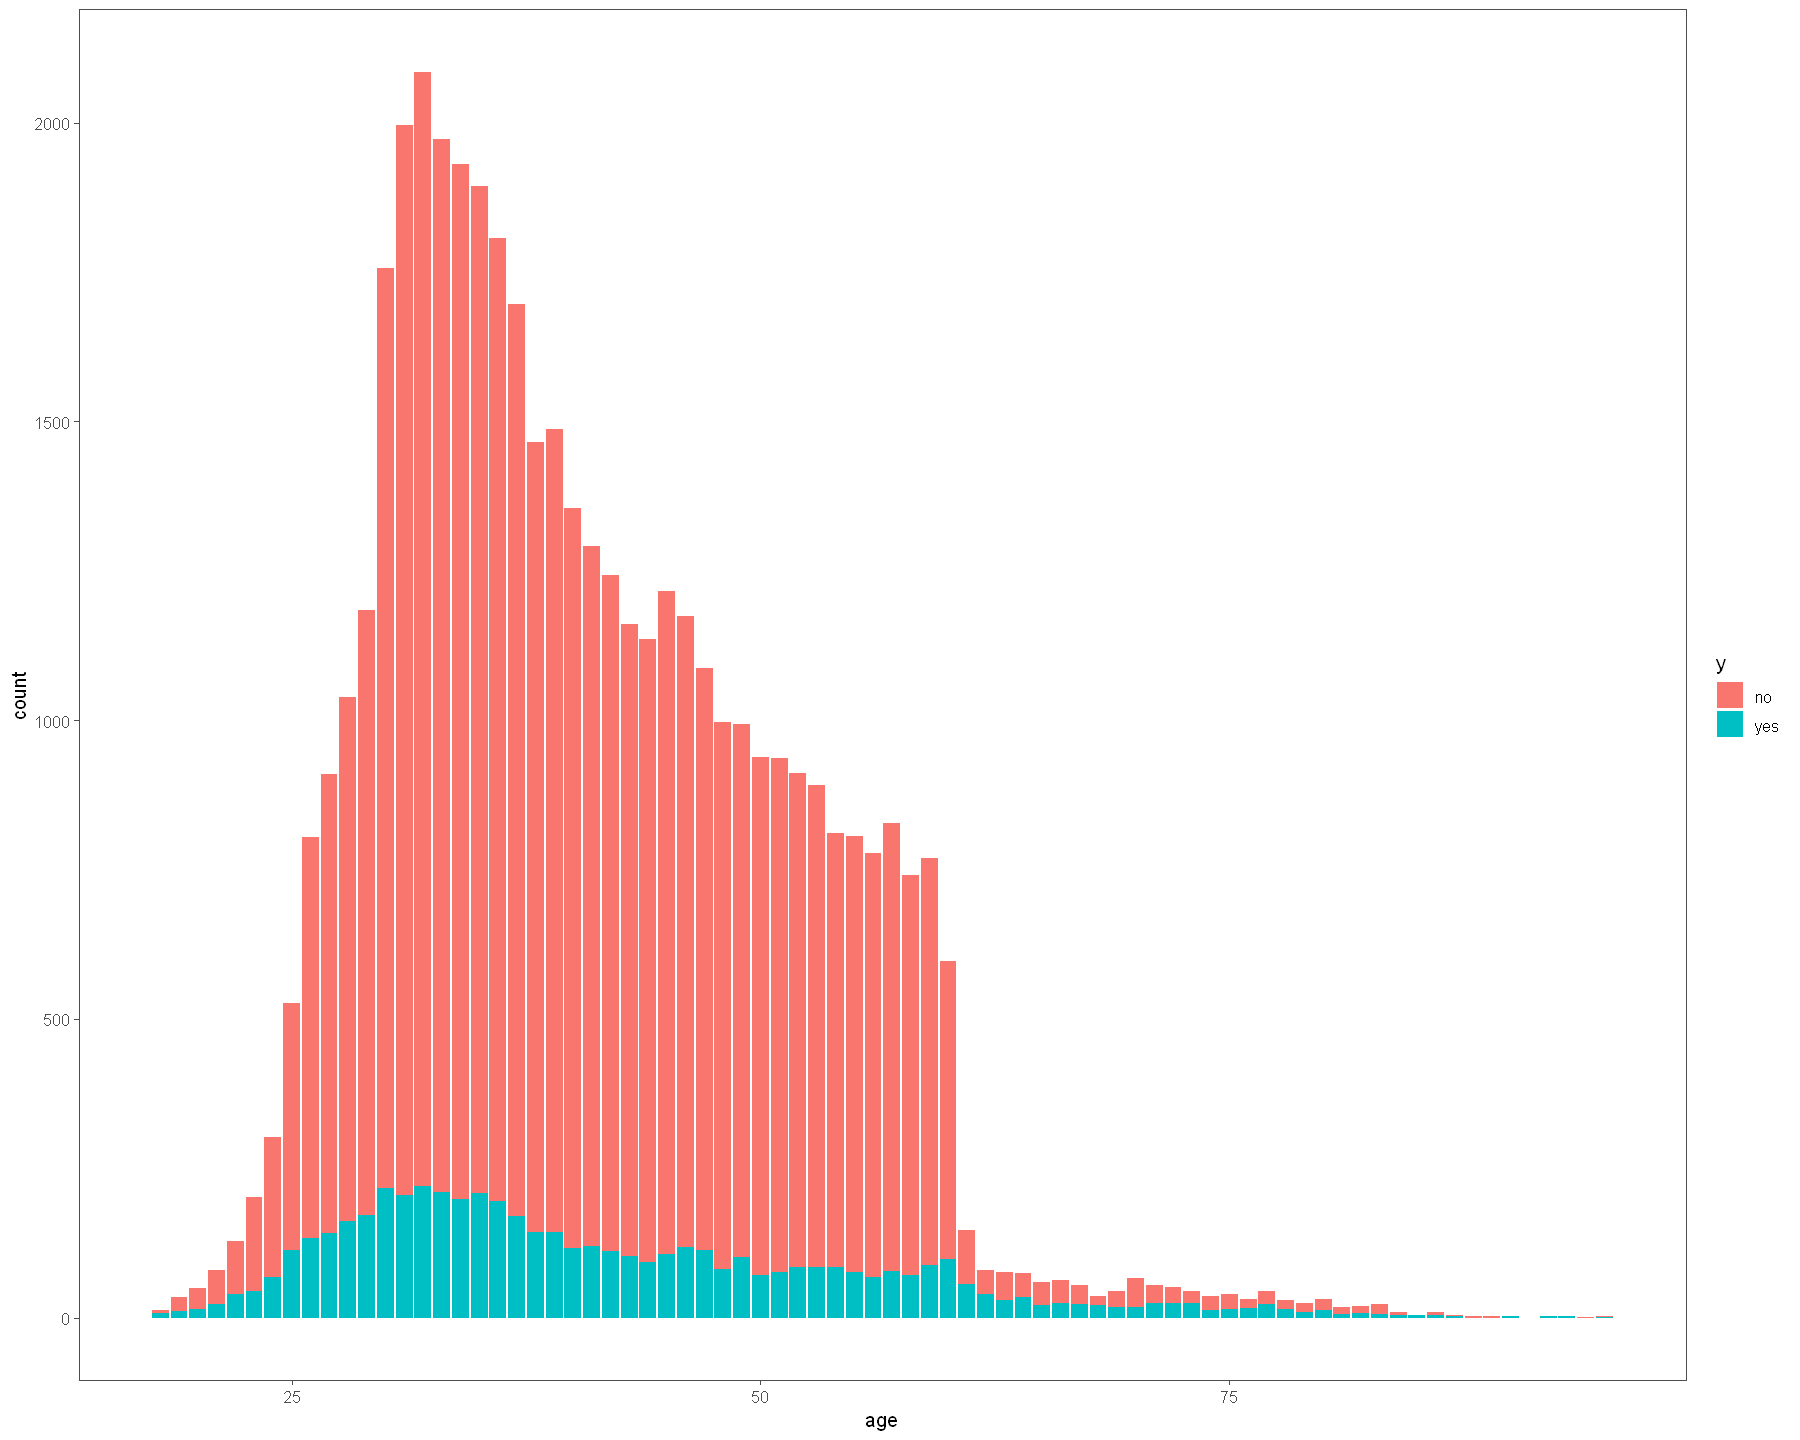

In [169]:
ggplot(data=data, mapping = aes(x=age, fill=y)) + geom_bar()+theme_few()

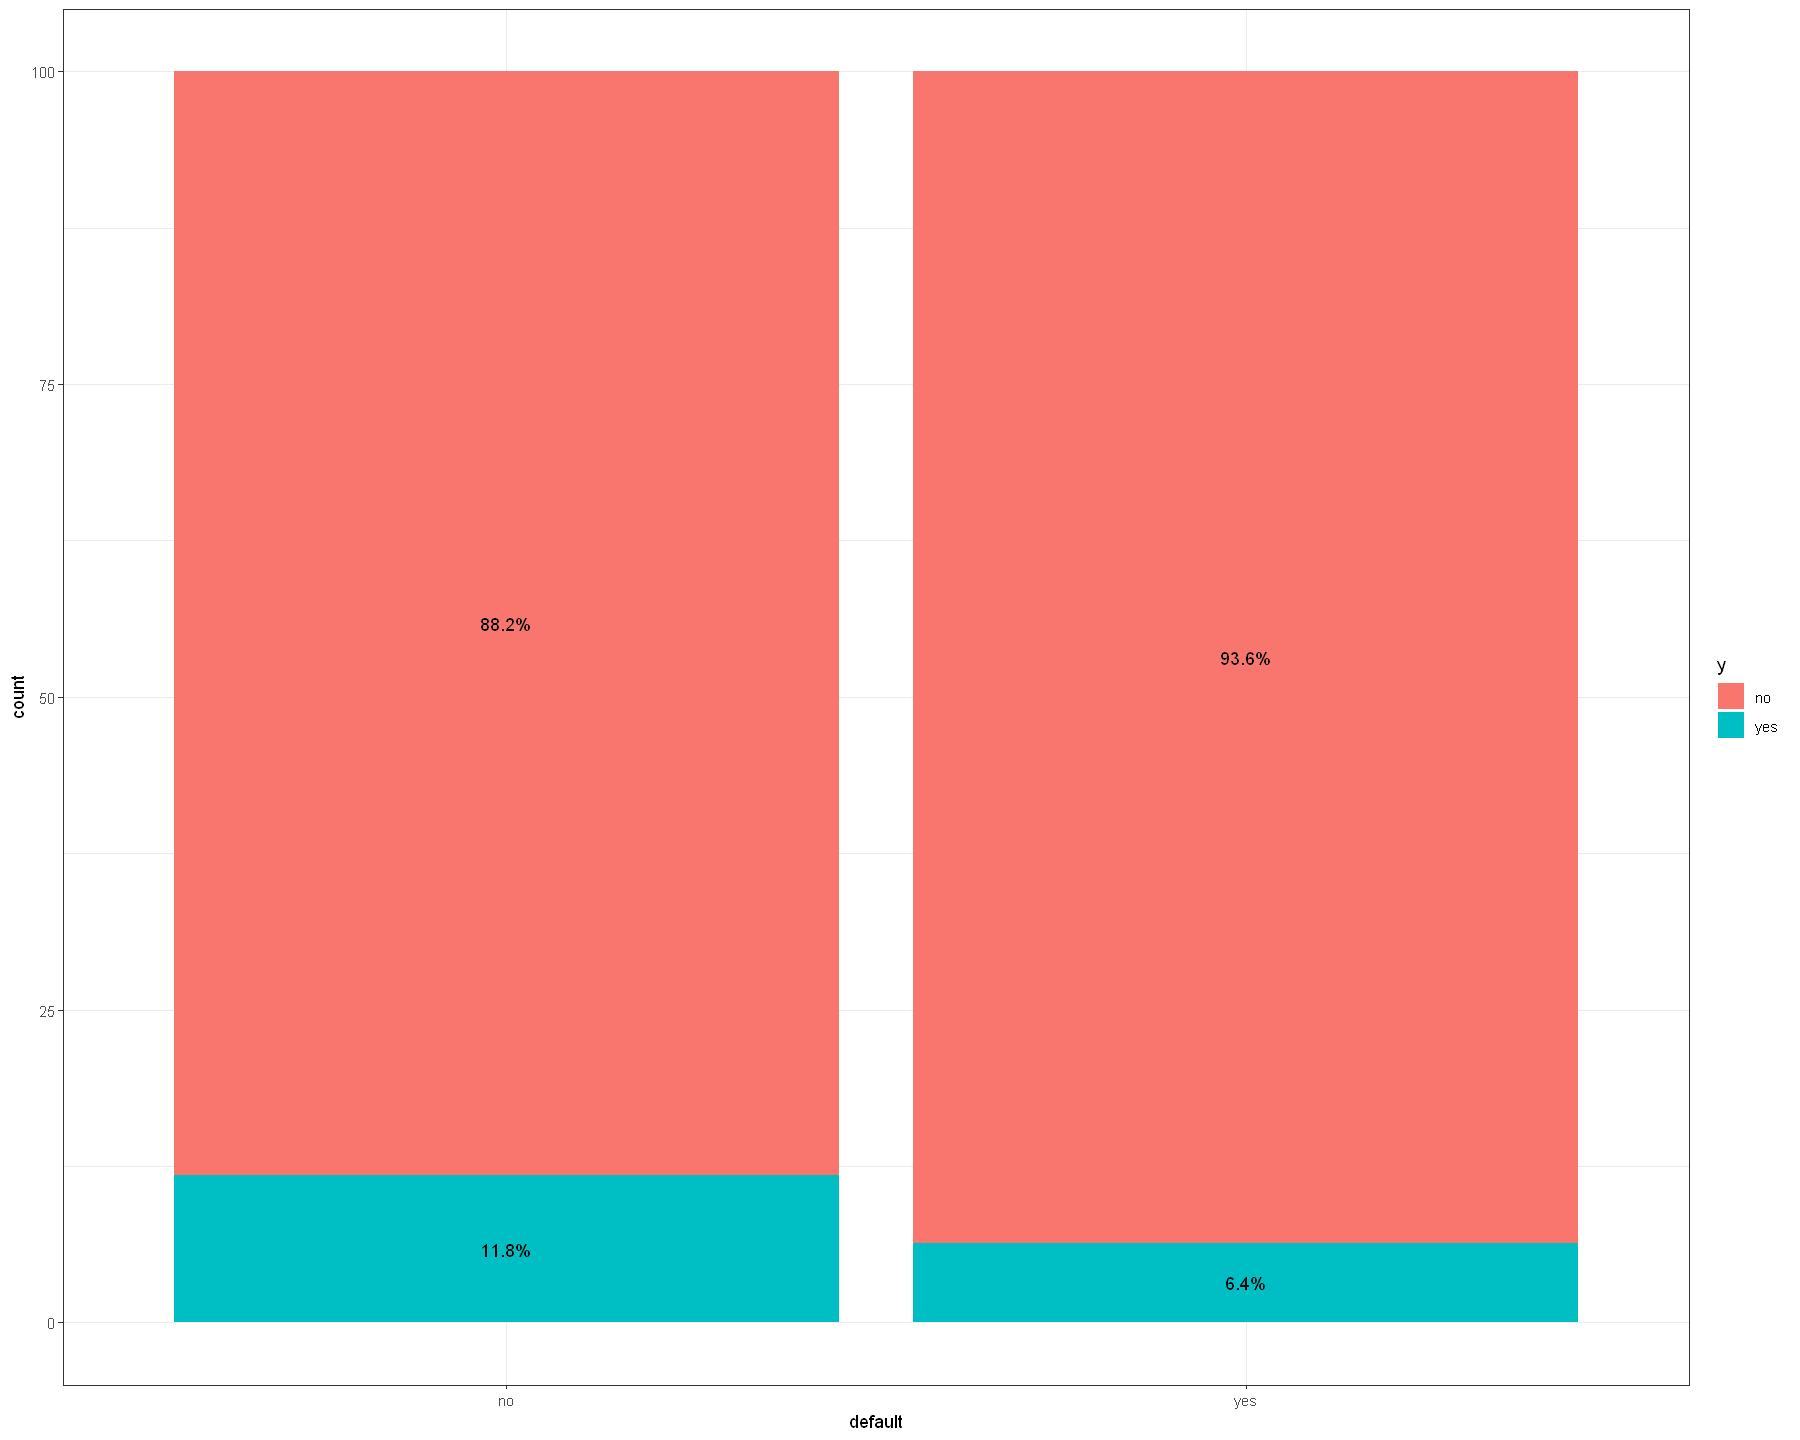

In [170]:
data %>%
  count(default, y) %>%       
  group_by(default) %>%
  mutate(count= prop.table(n) * 100) %>%
  ggplot() + aes(default, count, fill=y) +
  geom_bar(stat="identity") +
  geom_text(aes(label=paste0(sprintf("%1.1f", count),"%")),
            position=position_stack(vjust=0.5)) +
  theme_bw()

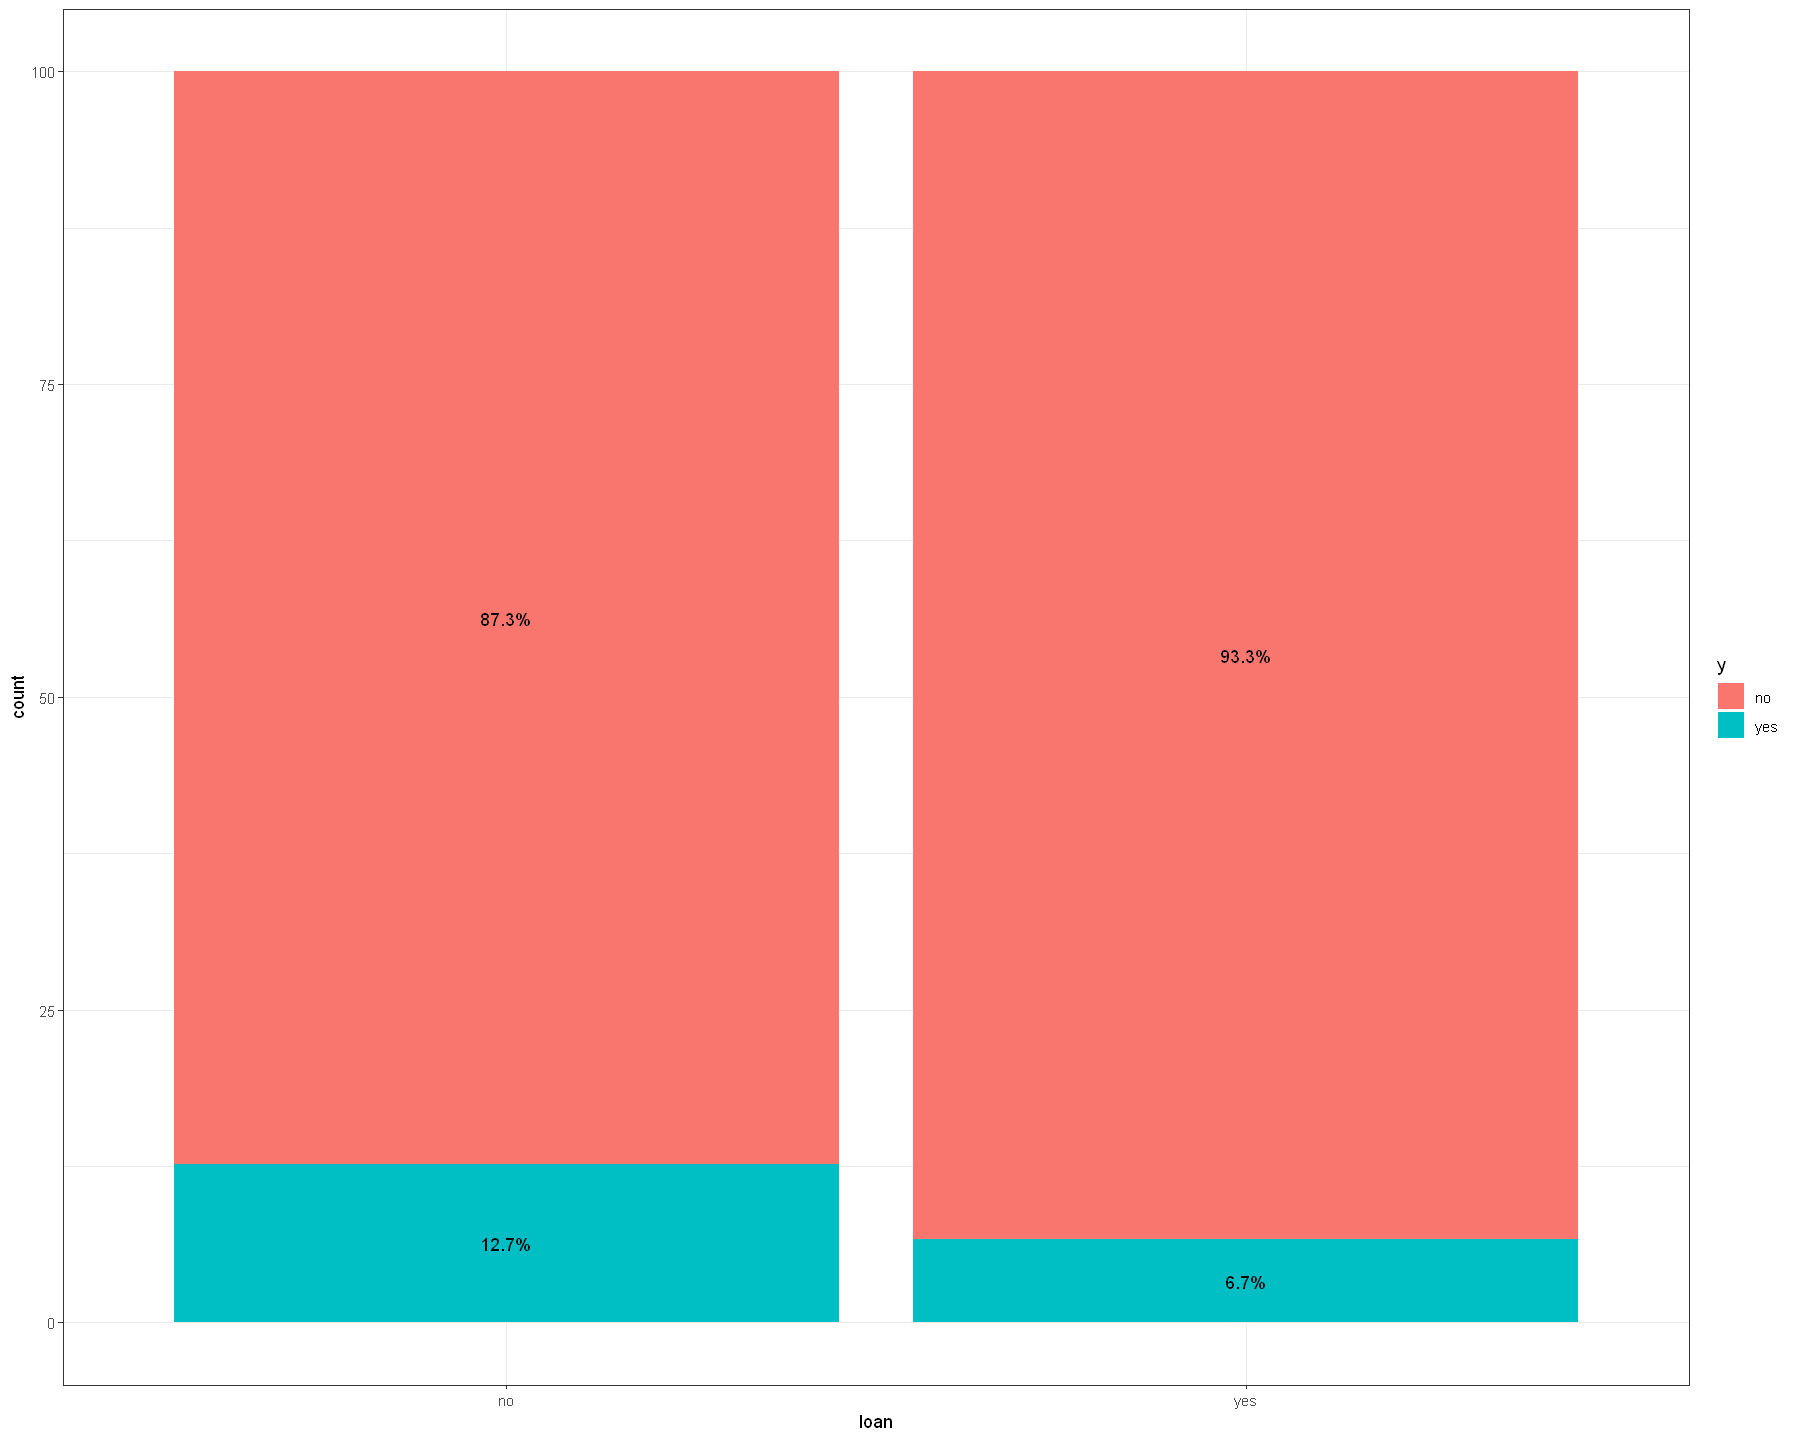

In [171]:
data %>%
  count(loan, y) %>%       
  group_by(loan) %>%
  mutate(count= prop.table(n) * 100) %>%
  ggplot() + aes(loan, count, fill=y) +
  geom_bar(stat="identity") +
  geom_text(aes(label=paste0(sprintf("%1.1f", count),"%")),
            position=position_stack(vjust=0.5)) +
  theme_bw()

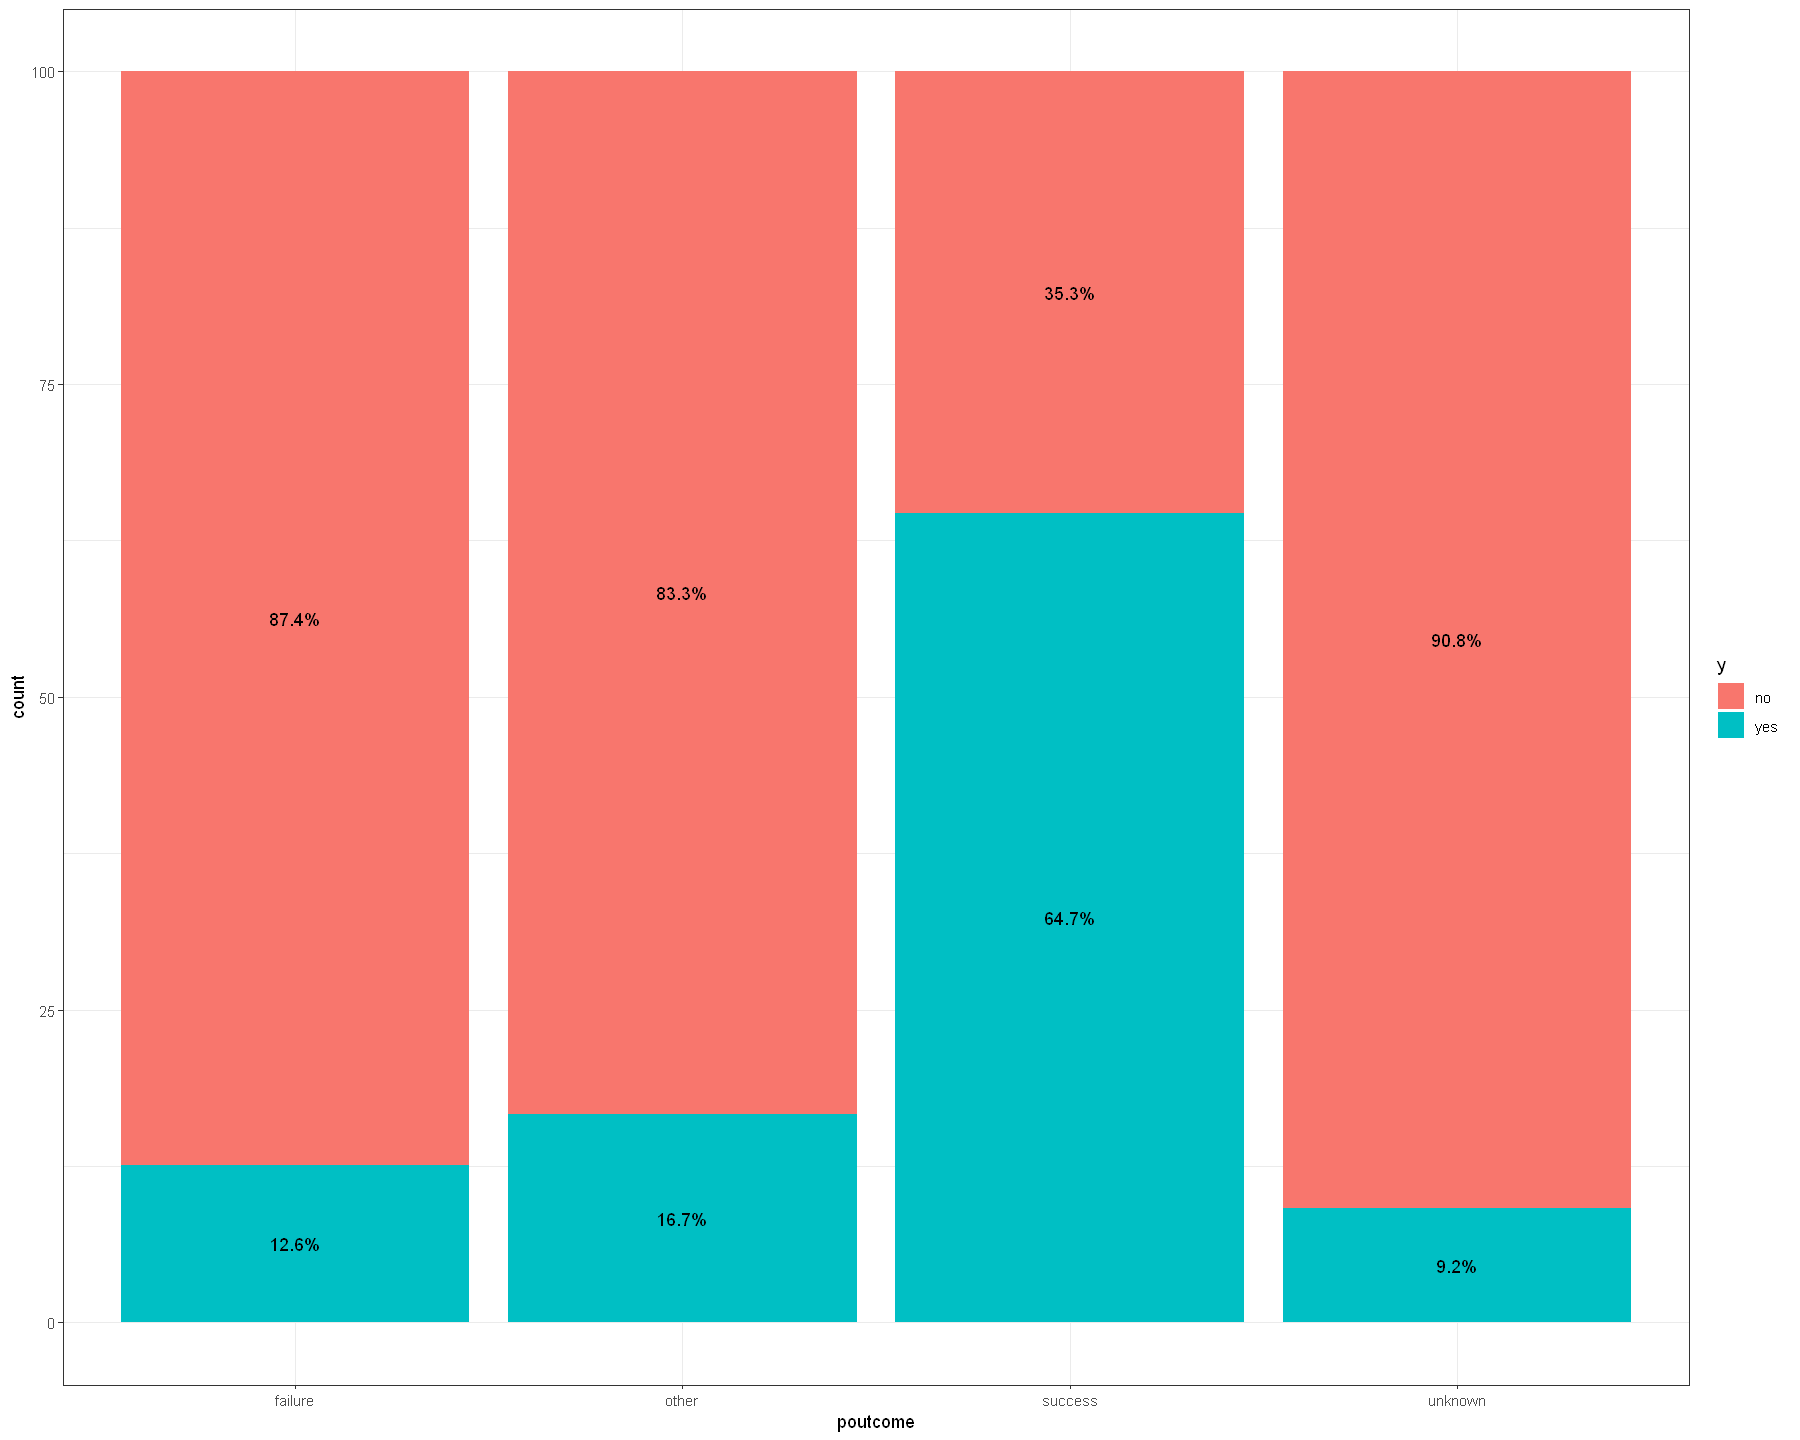

In [172]:
data %>%
  count(poutcome, y) %>%       
  group_by(poutcome) %>%
  mutate(count= prop.table(n) * 100) %>%
  ggplot() + aes(poutcome, count, fill=y) +
  geom_bar(stat="identity") +
  geom_text(aes(label=paste0(sprintf("%1.1f", count),"%")),
            position=position_stack(vjust=0.5)) +
  theme_bw()

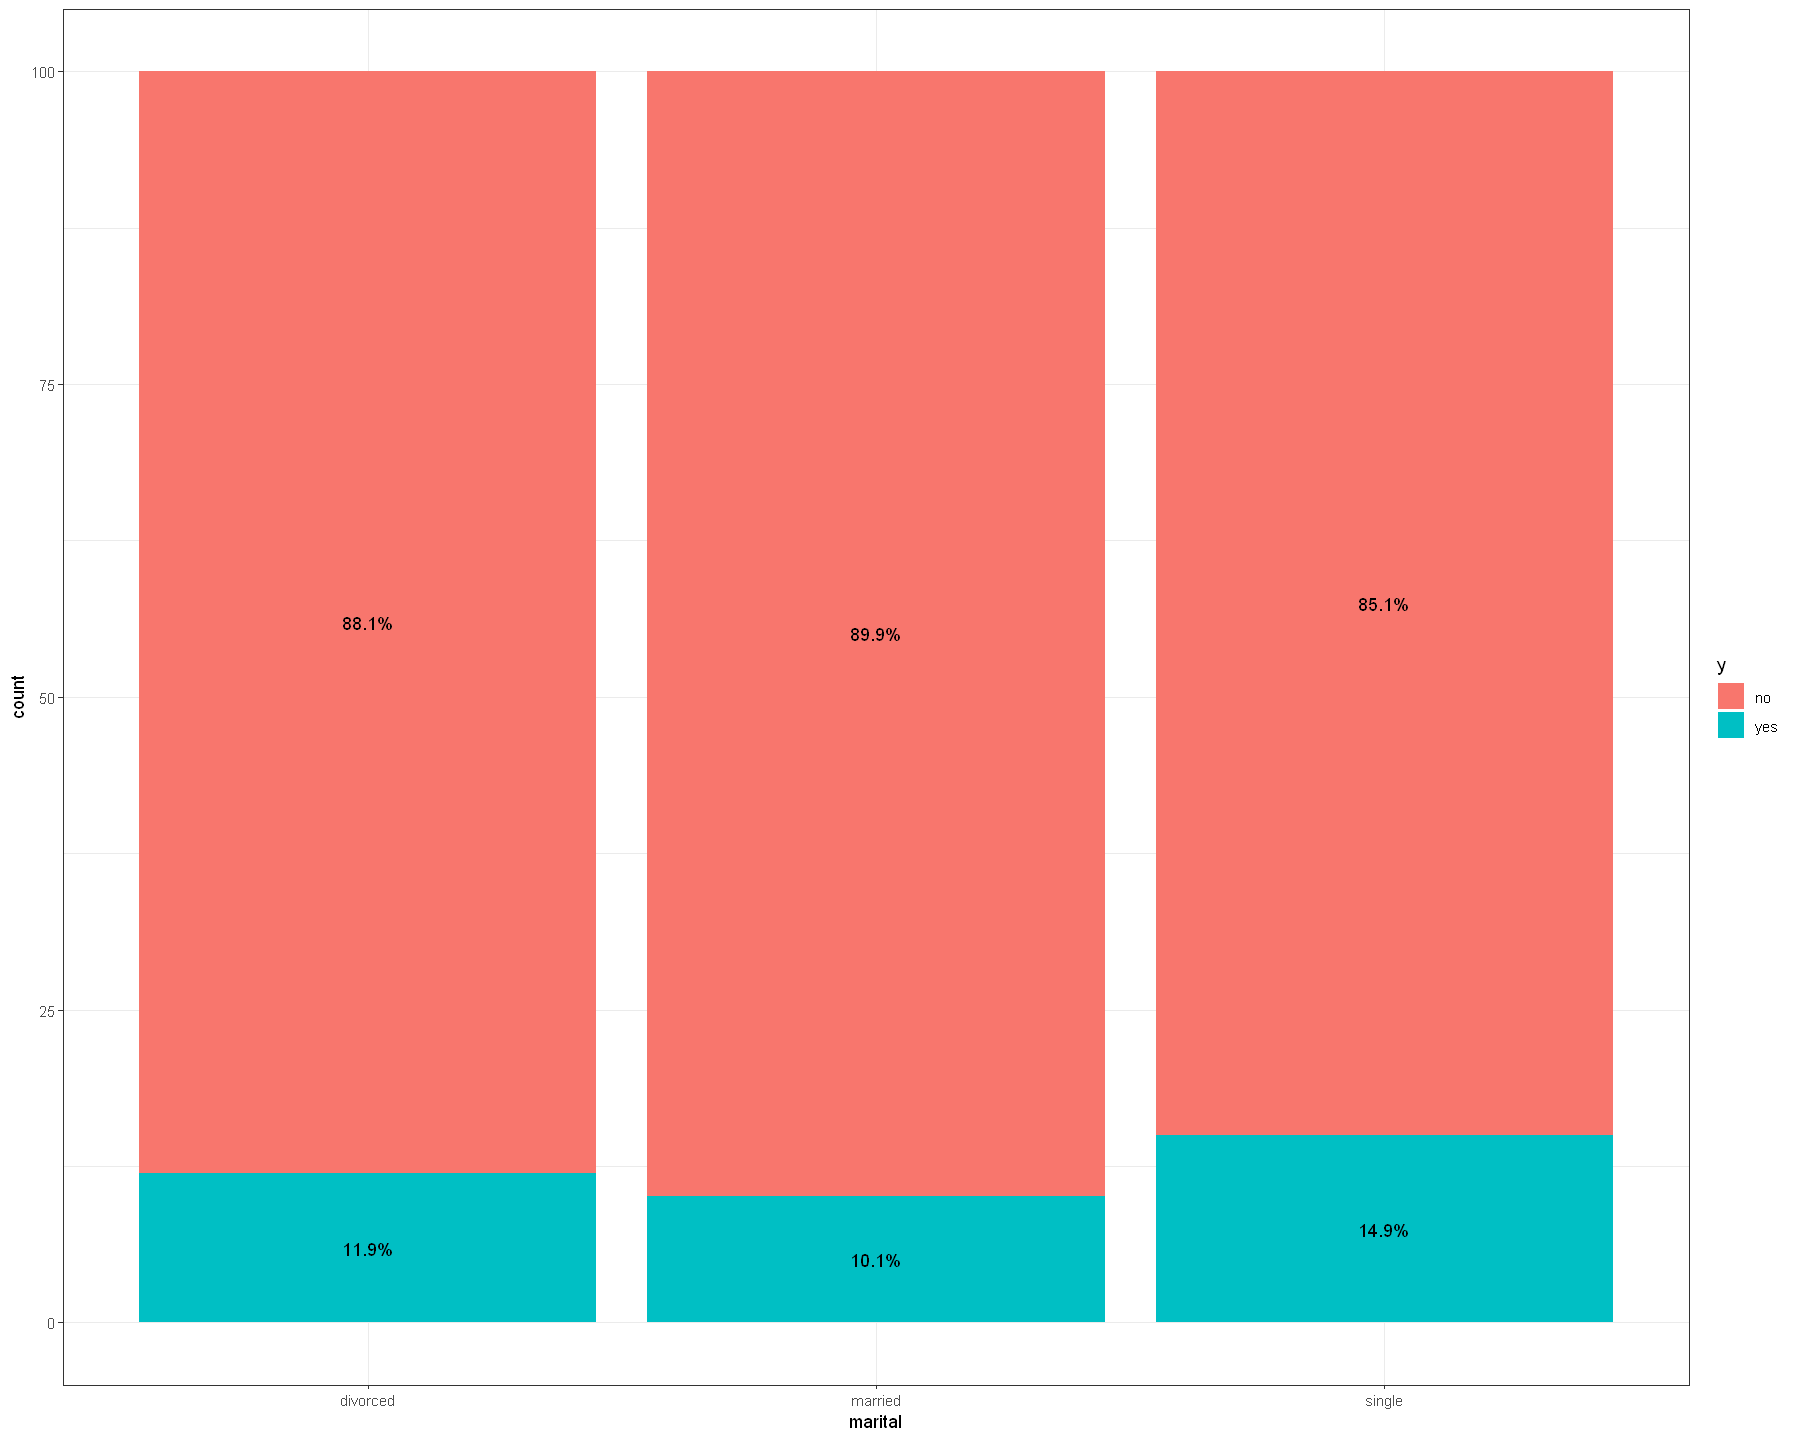

In [173]:
data %>%
  count(marital, y) %>%       
  group_by(marital) %>%
  mutate(count= prop.table(n) * 100) %>%
  ggplot() + aes(marital, count, fill=y) +
  geom_bar(stat="identity") +
  geom_text(aes(label=paste0(sprintf("%1.1f", count),"%")),
            position=position_stack(vjust=0.5)) +
  theme_bw()

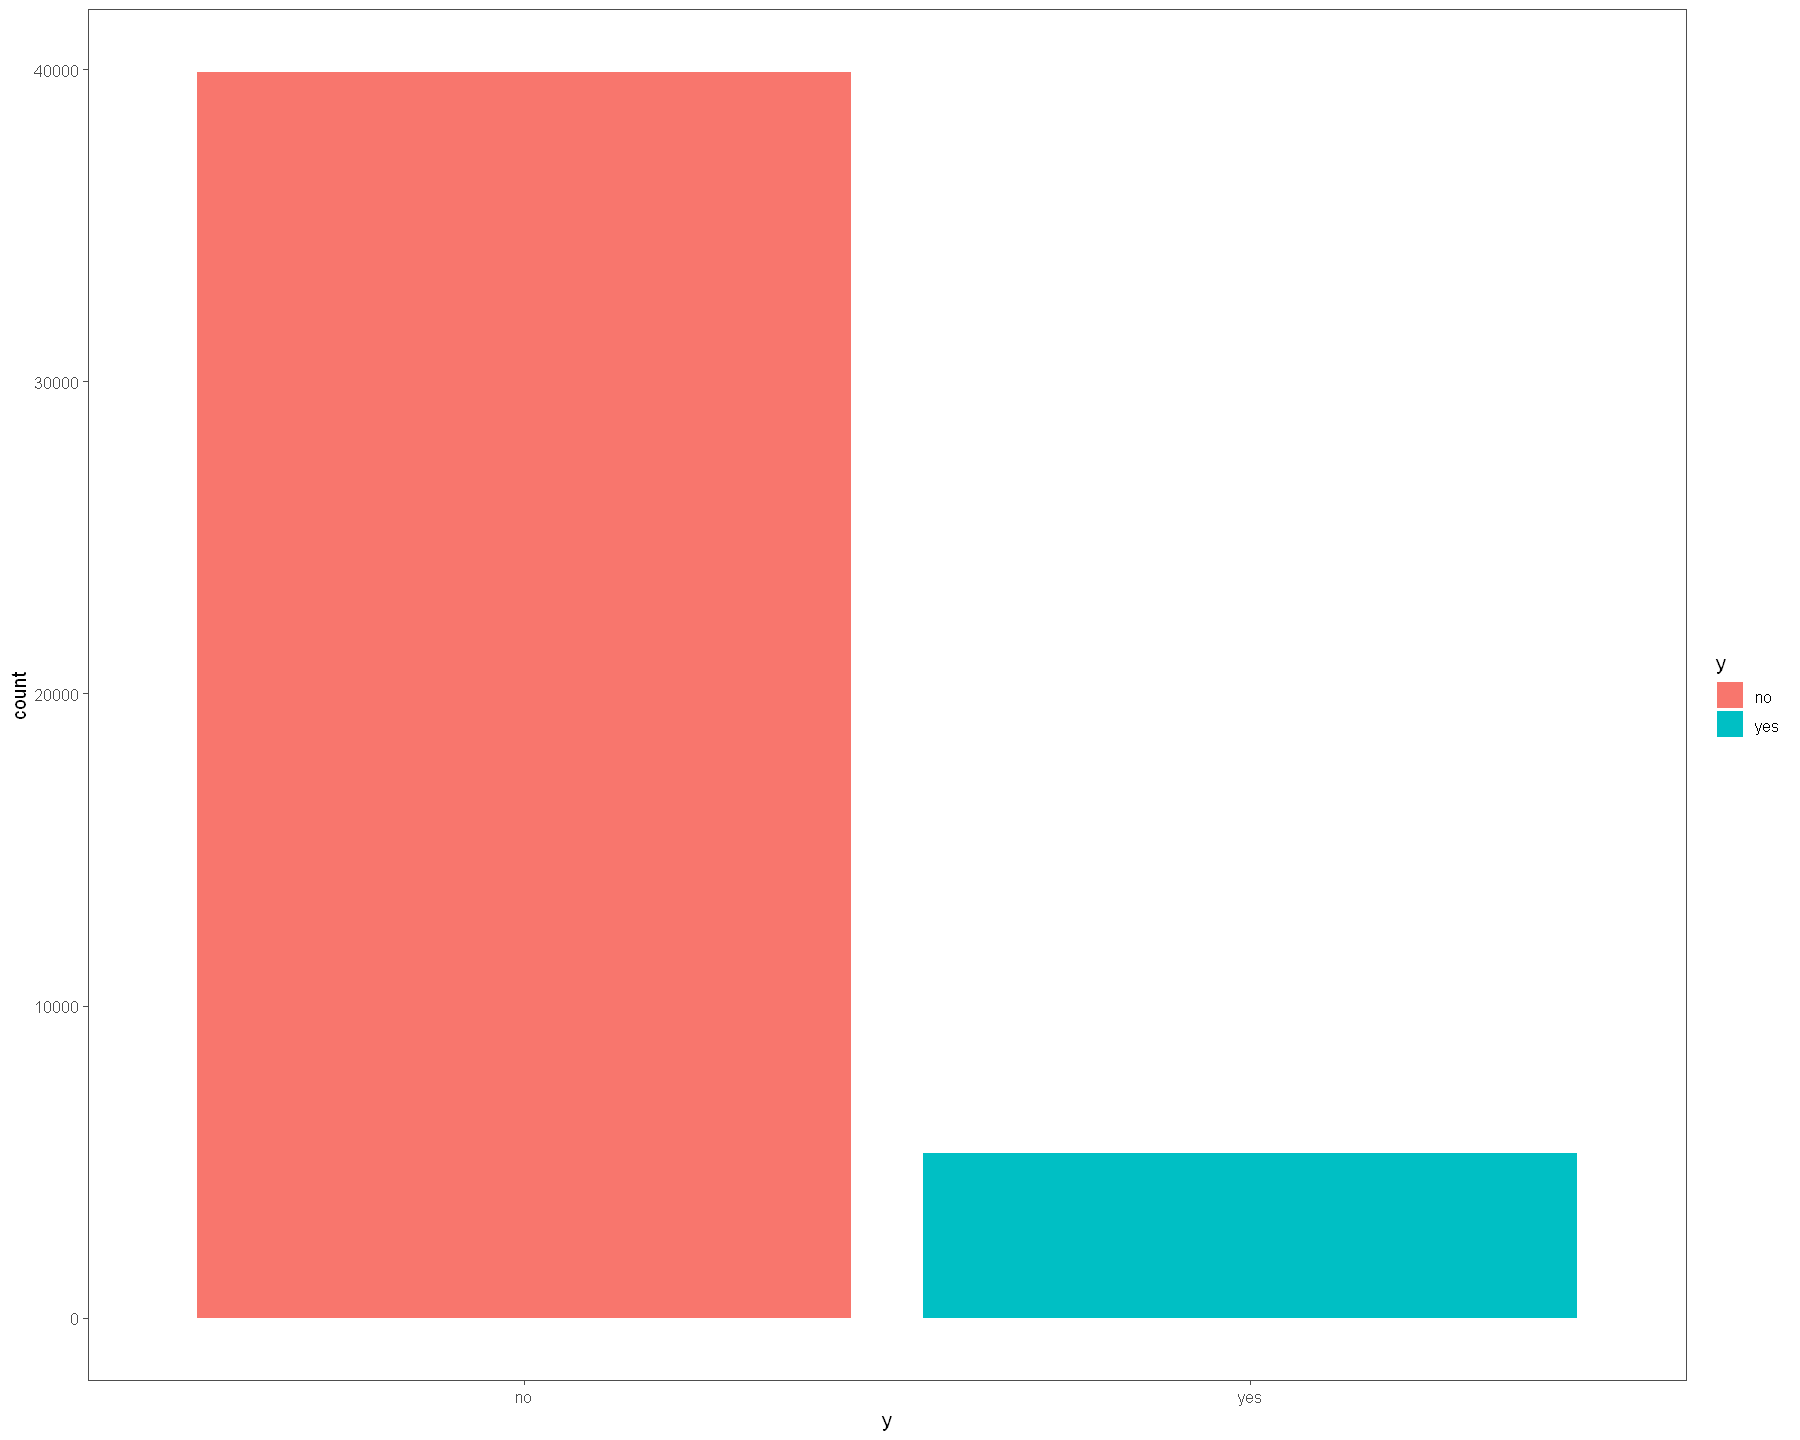

In [174]:
ggplot(data=data, mapping = aes(x=y, fill=y)) + geom_bar()+theme_few()
#88% did not accept the banck product only 12% accept it

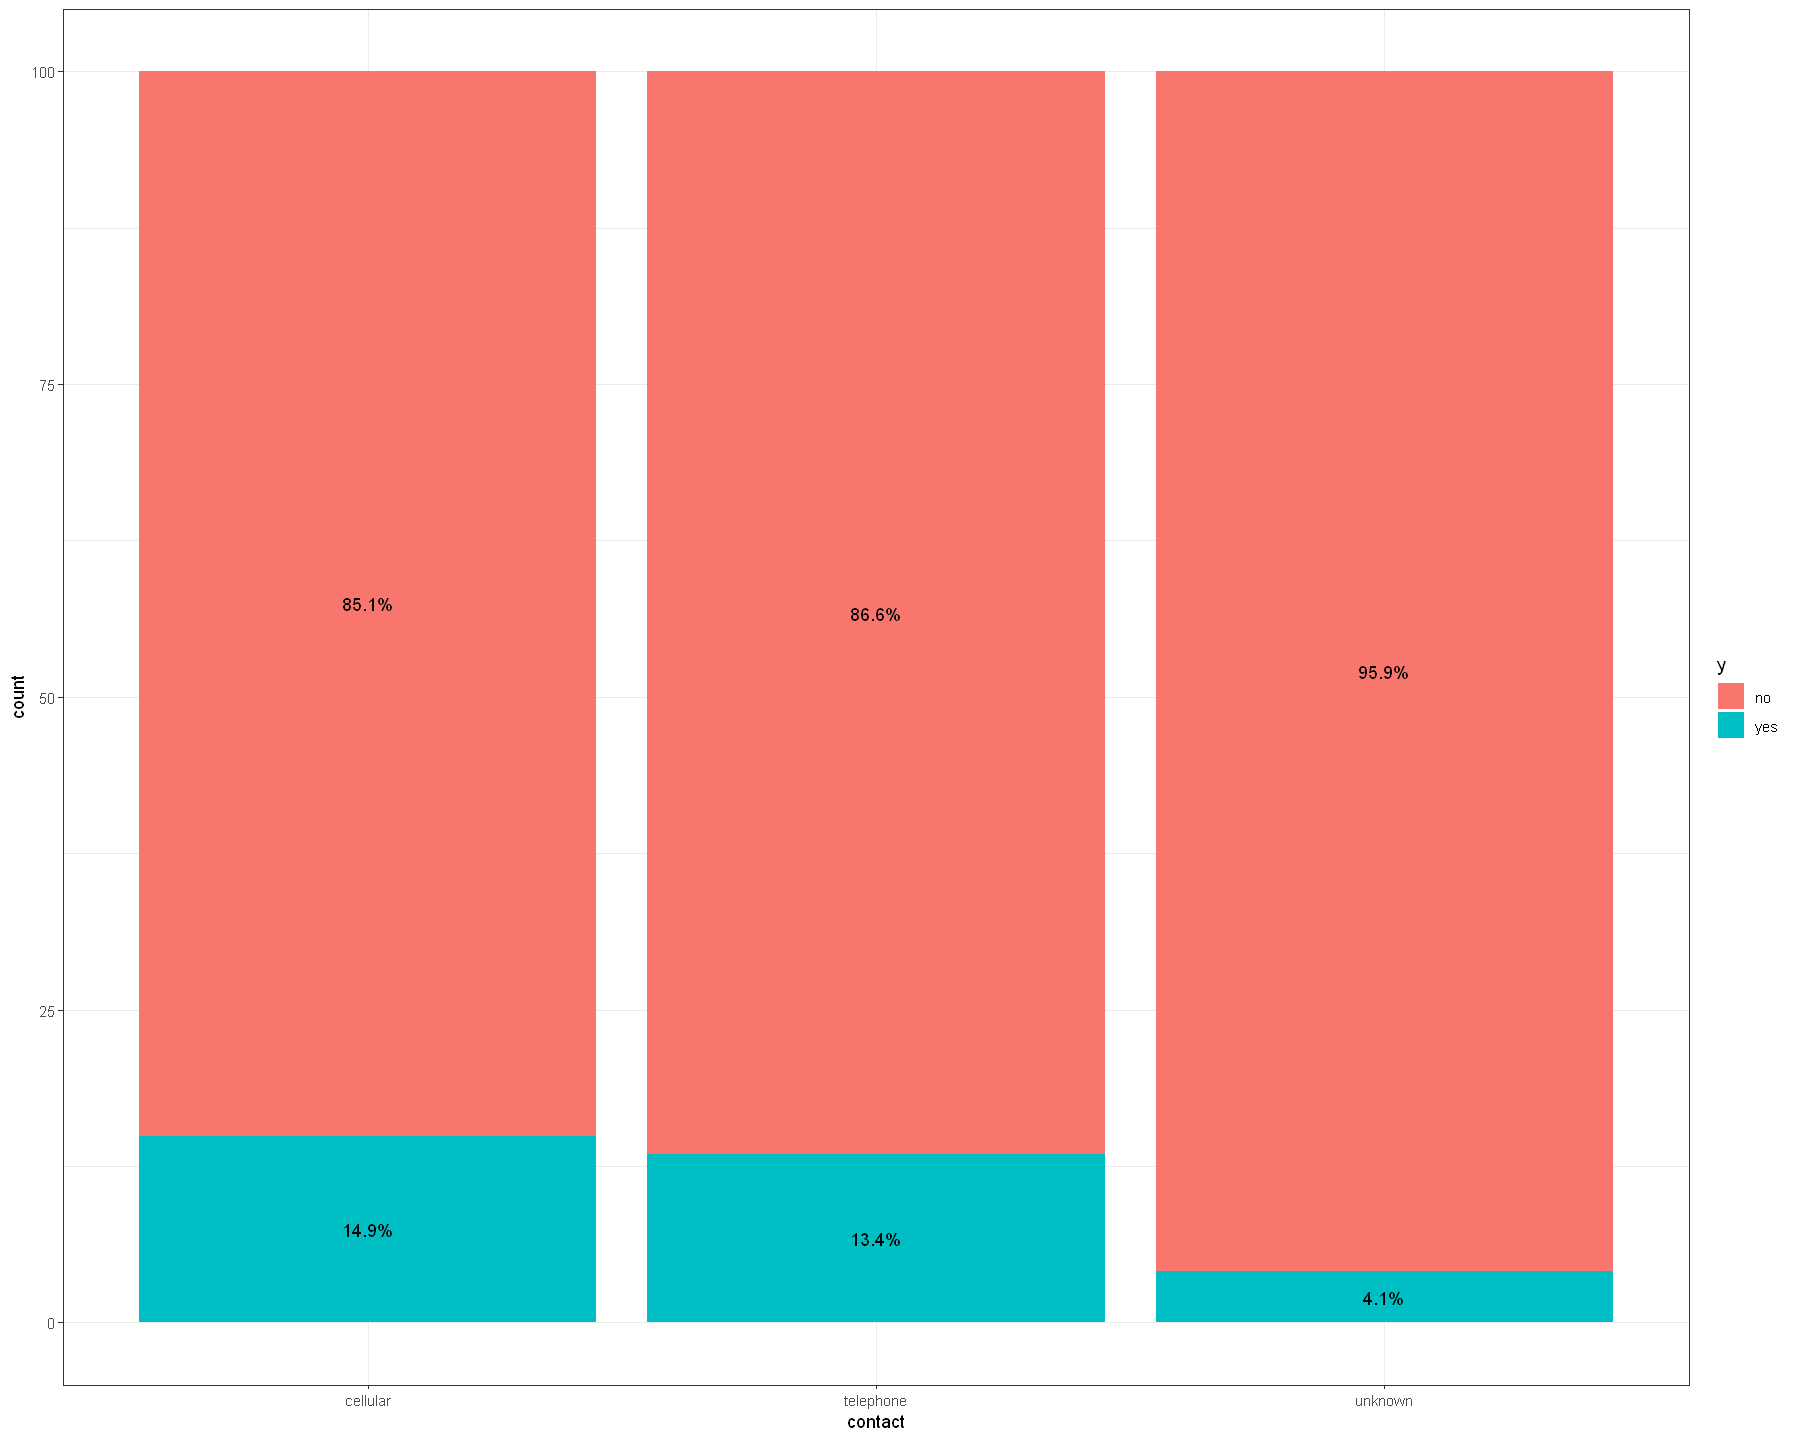

In [175]:
data %>%
  count(contact, y) %>%       
  group_by(contact) %>%
  mutate(count= prop.table(n) * 100) %>%
  ggplot() + aes(contact, count, fill=y) +
  geom_bar(stat="identity") +
  geom_text(aes(label=paste0(sprintf("%1.1f", count),"%")),
            position=position_stack(vjust=0.5)) +
  theme_bw()

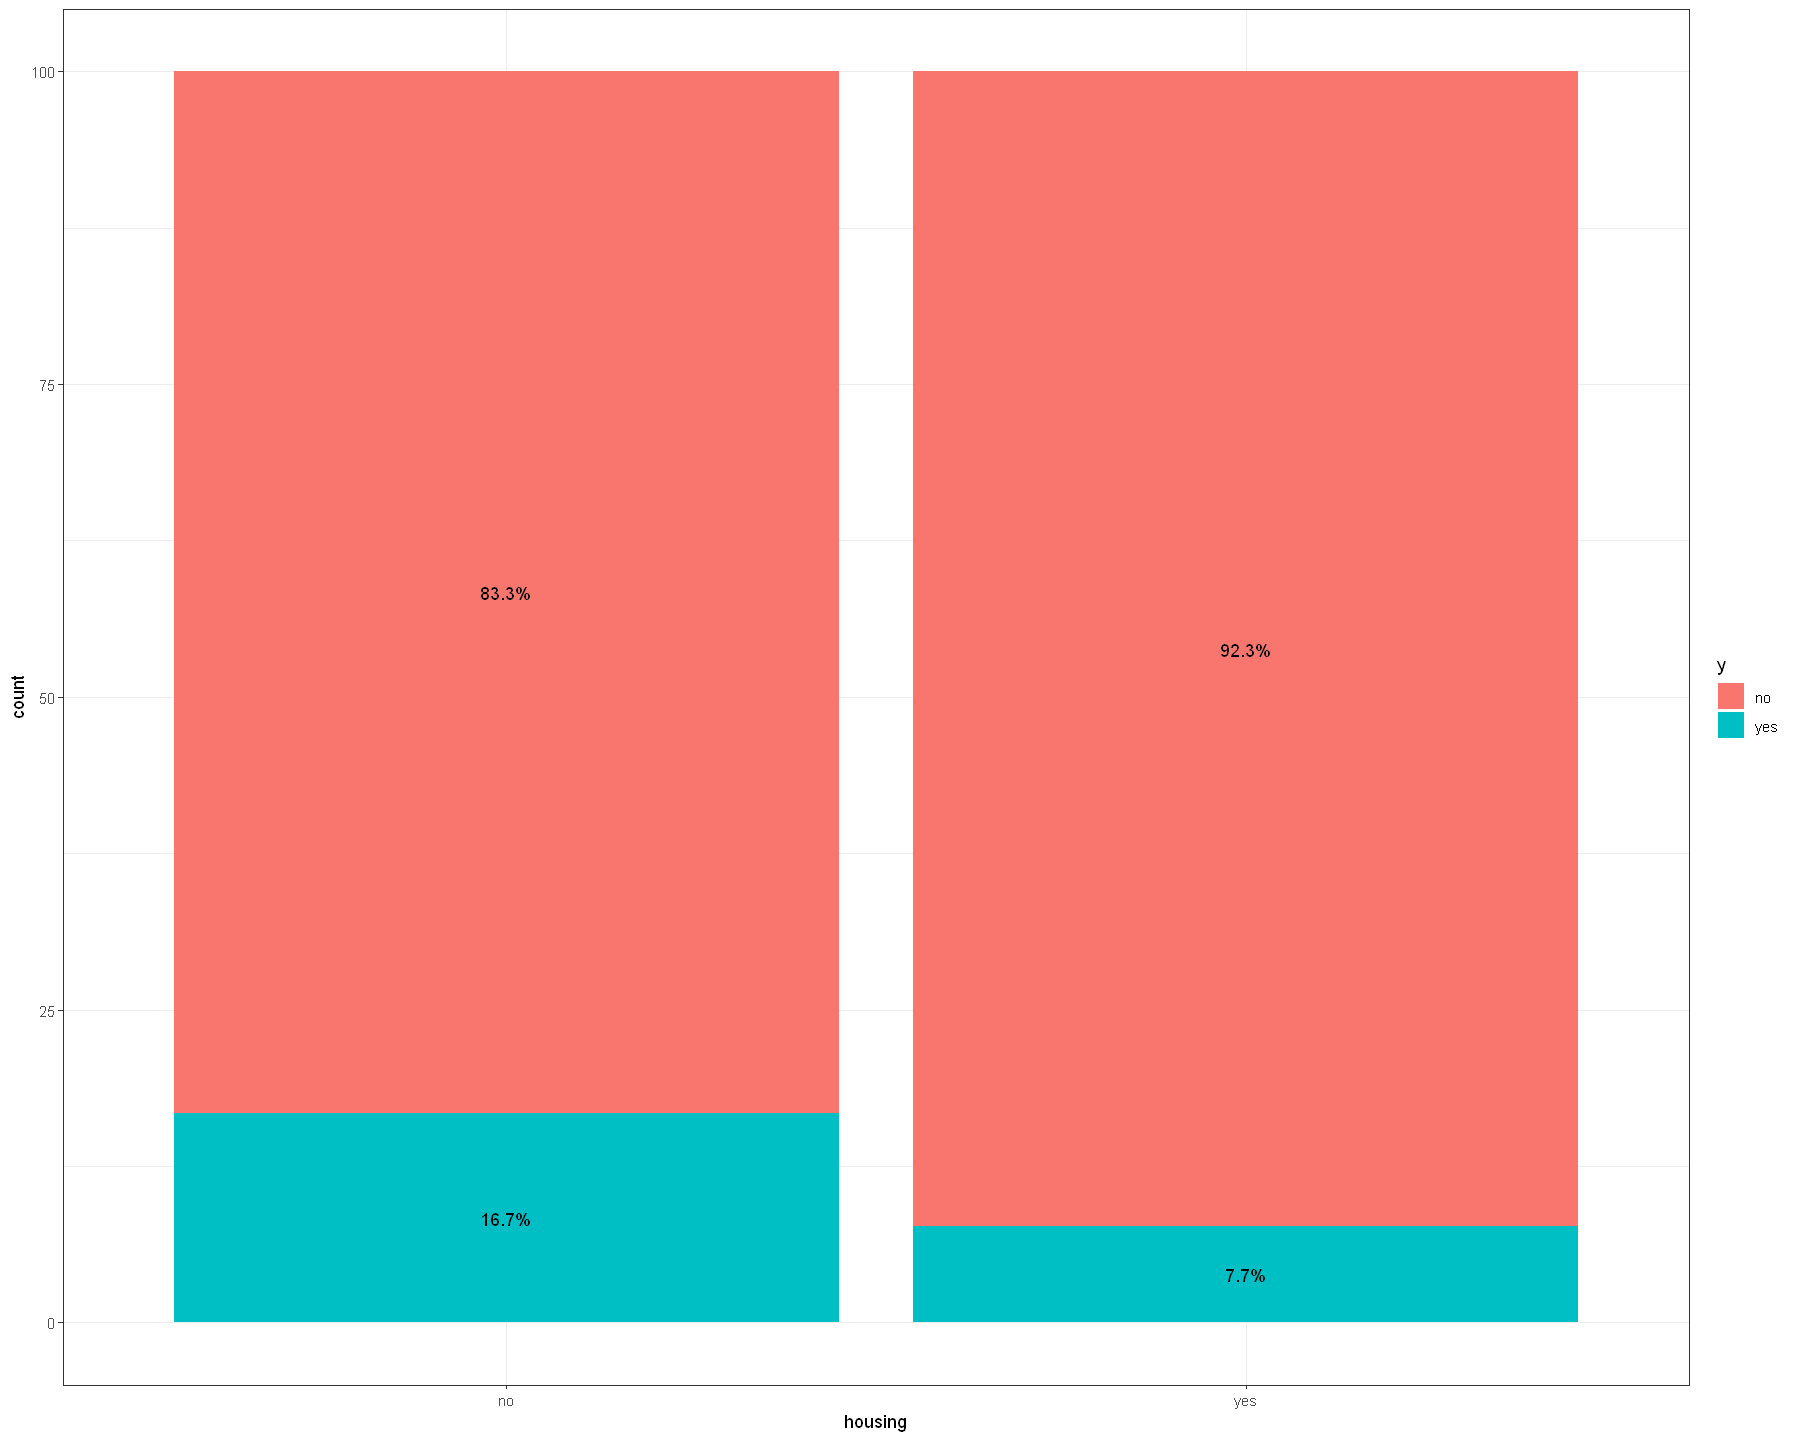

In [176]:
data %>%
  count(housing, y) %>%       
  group_by(housing) %>%
  mutate(count= prop.table(n) * 100) %>%
  ggplot() + aes(housing, count, fill=y) +
  geom_bar(stat="identity") +
  geom_text(aes(label=paste0(sprintf("%1.1f", count),"%")),
            position=position_stack(vjust=0.5)) +
  theme_bw()

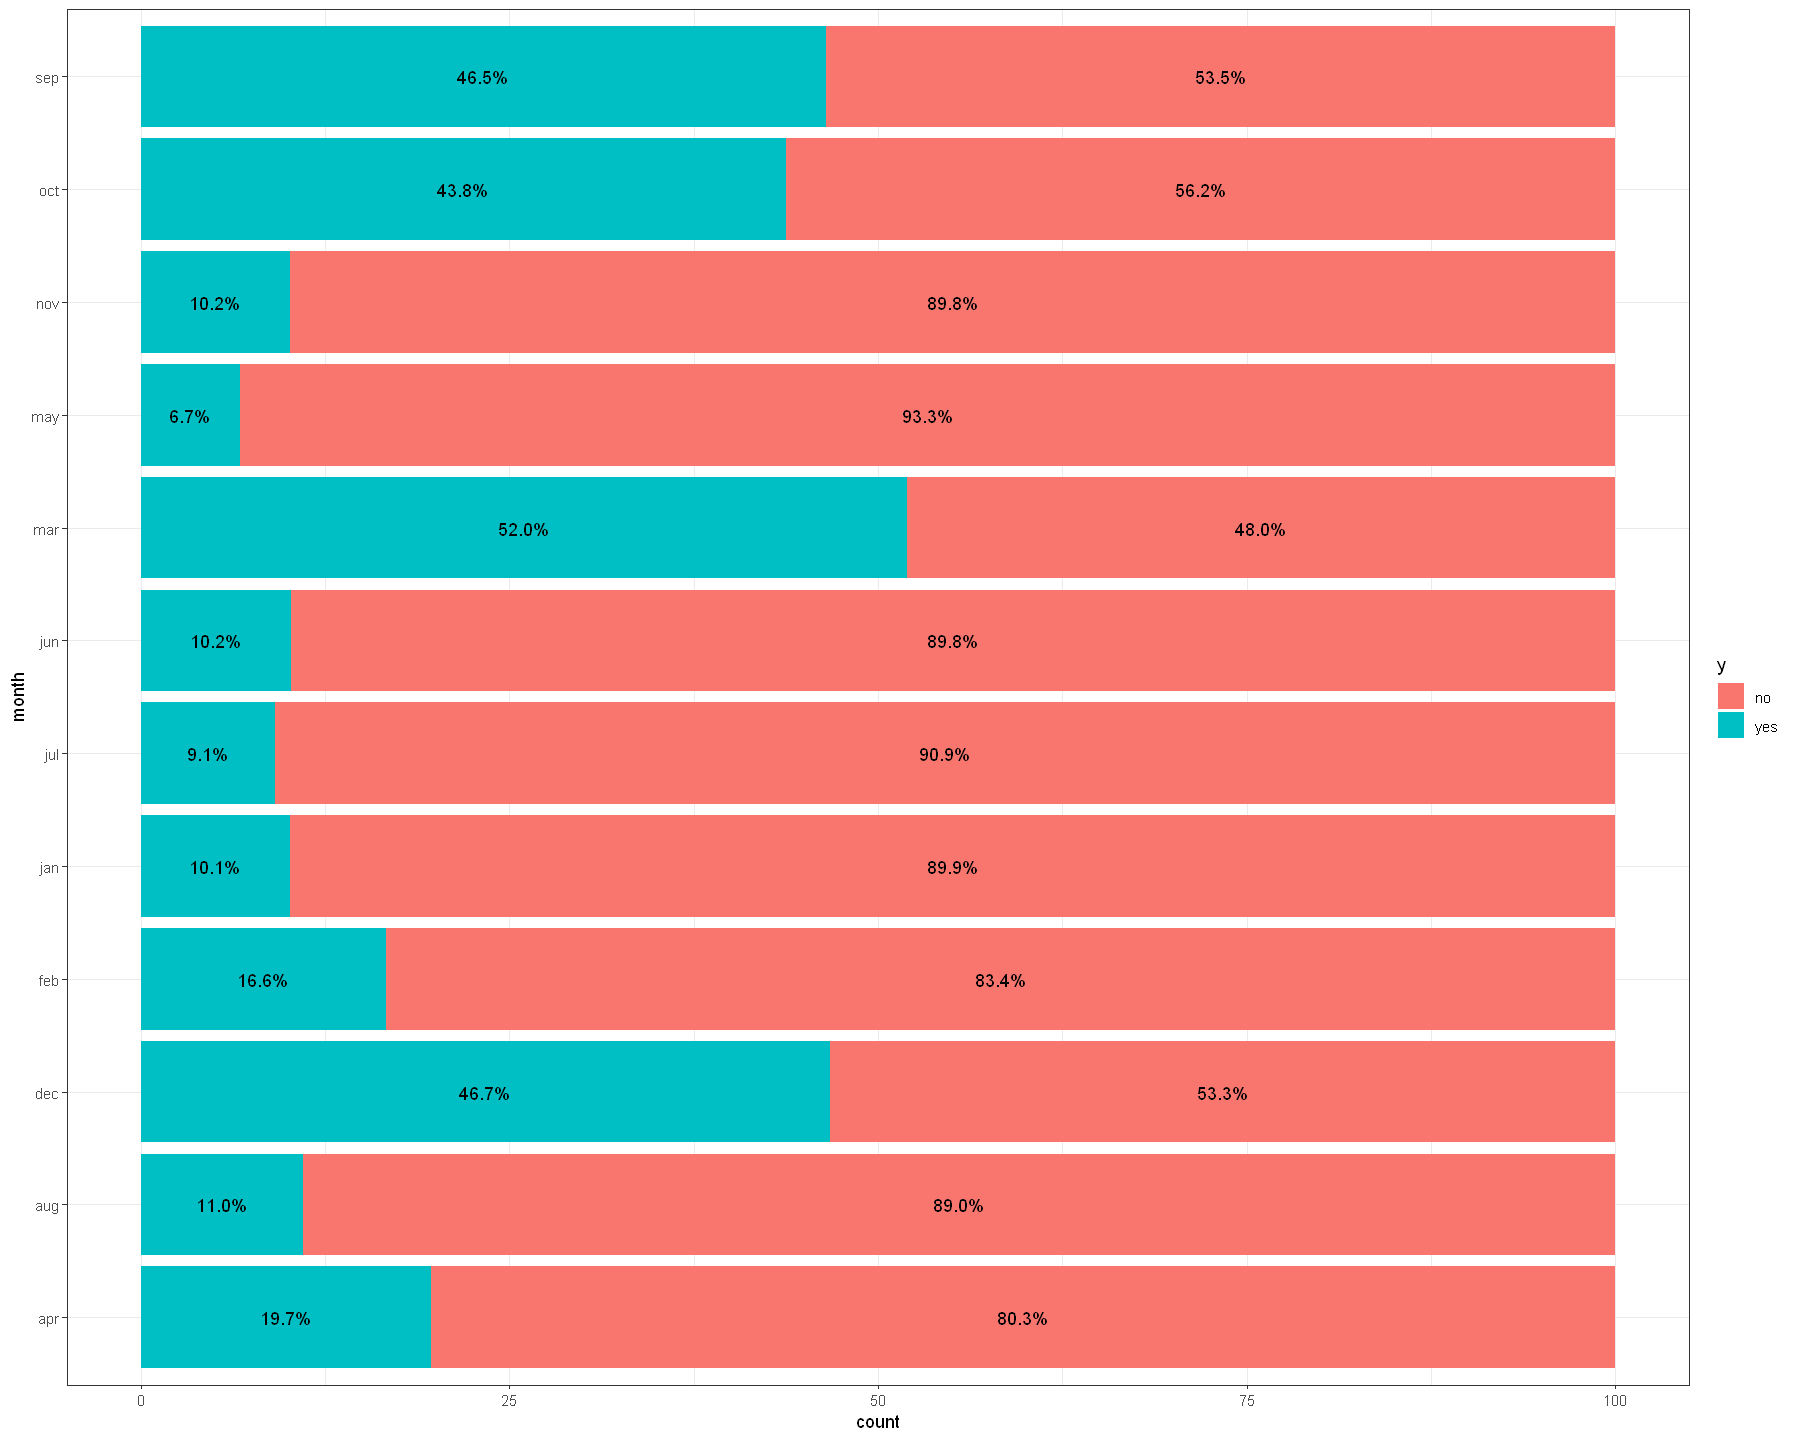

In [177]:
data %>%
  count(month, y) %>%       
  group_by(month) %>%
  mutate(count= prop.table(n) * 100) %>%
  ggplot() + aes(y=month, count, fill=y) +
  geom_bar(stat="identity") +
  geom_text(aes(label=paste0(sprintf("%1.1f", count),"%")),
            position=position_stack(vjust=0.5)) +
  theme_bw()

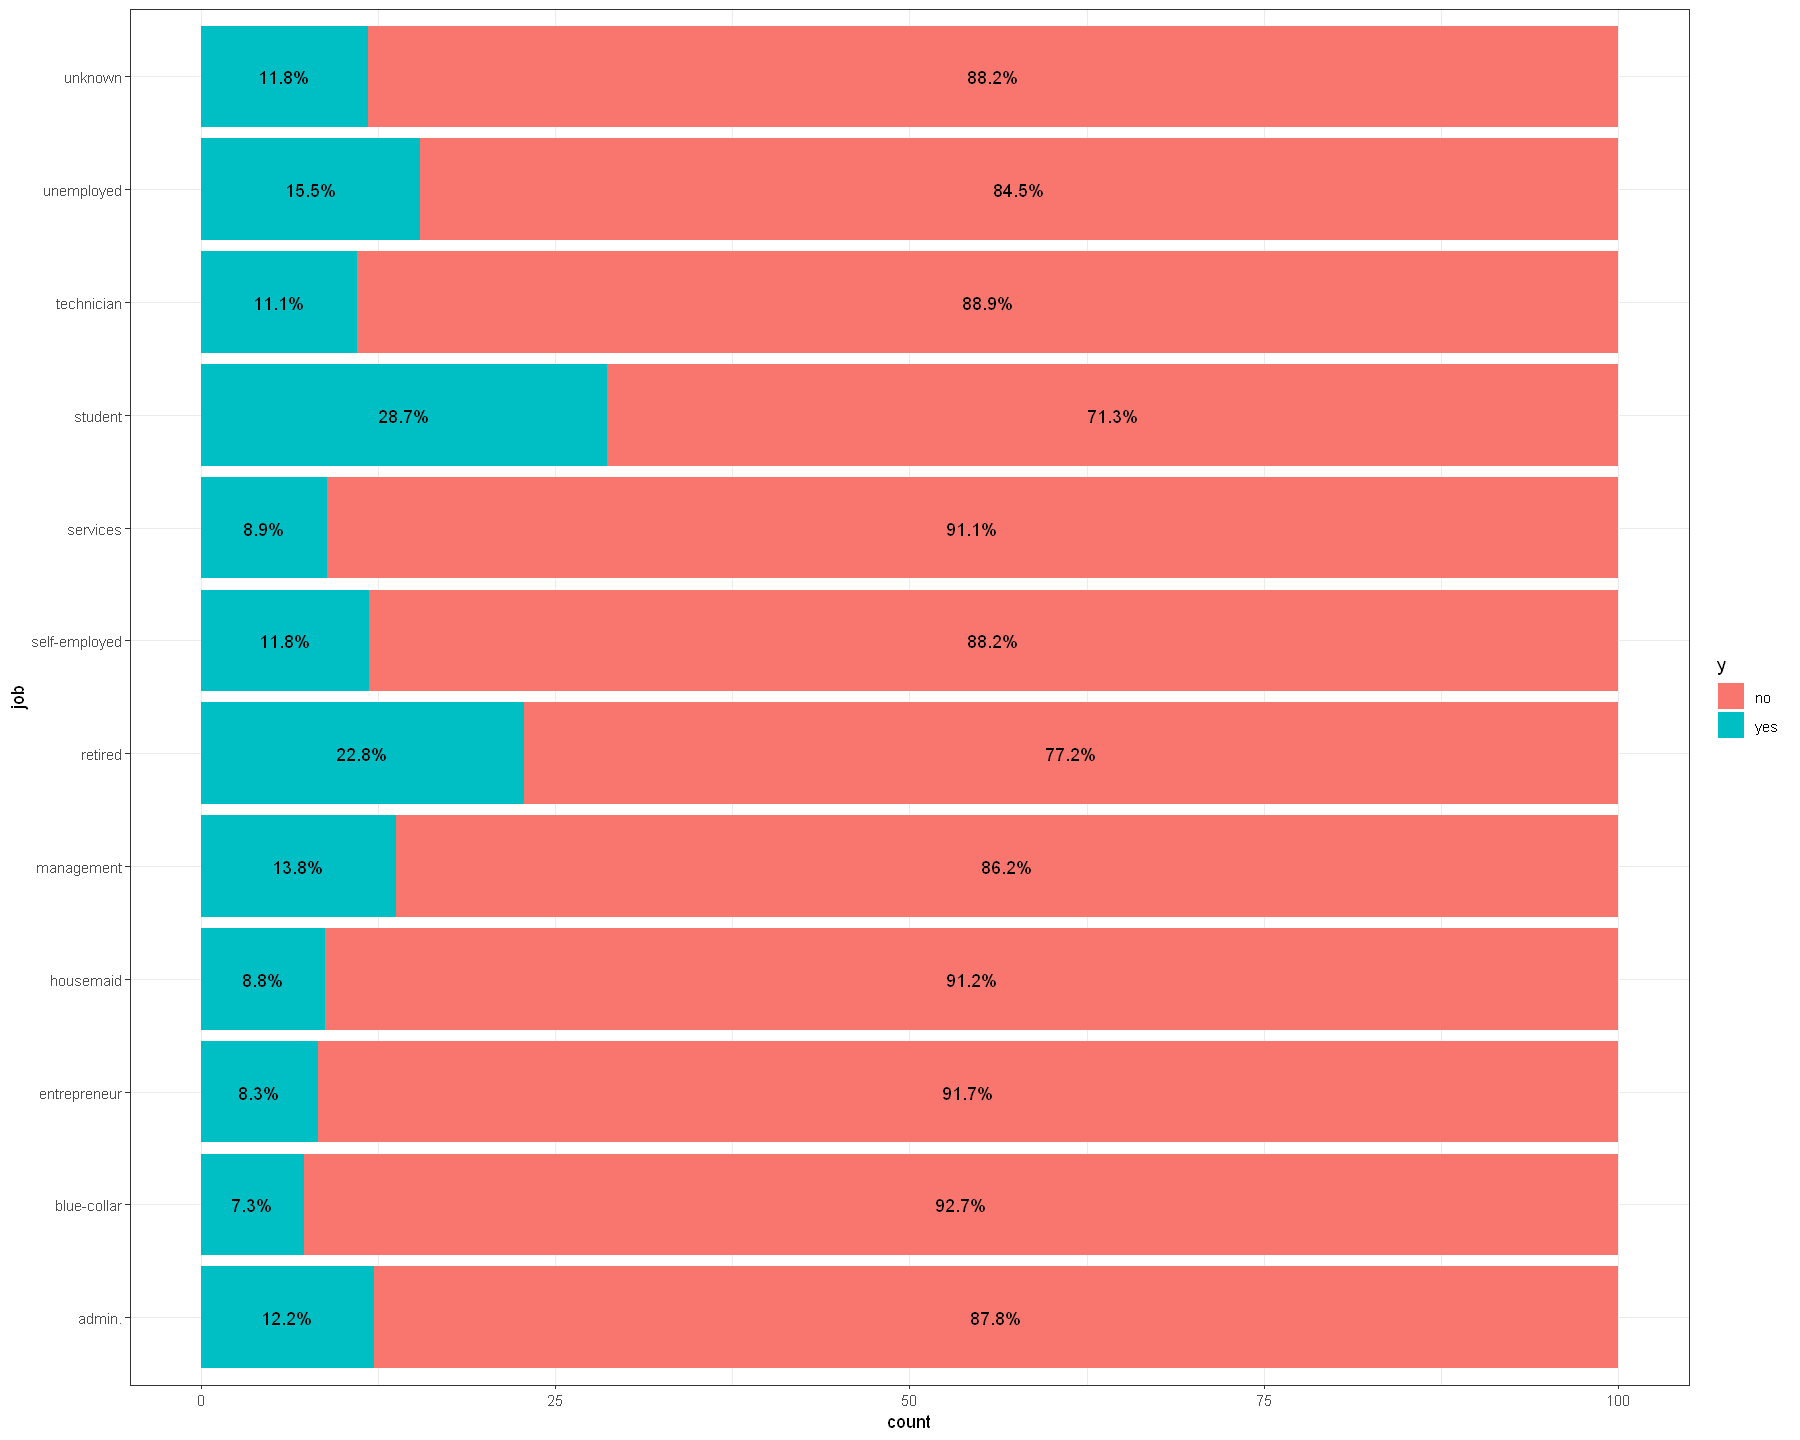

In [178]:
data %>%
  count(job, y) %>%       
  group_by(job) %>%
  mutate(count= prop.table(n) * 100) %>%
  ggplot() + aes(y=job, count, fill=y) +
  geom_bar(stat="identity") +
  geom_text(aes(label=paste0(sprintf("%1.1f", count),"%")),
            position=position_stack(vjust=0.5)) +
  theme_bw()

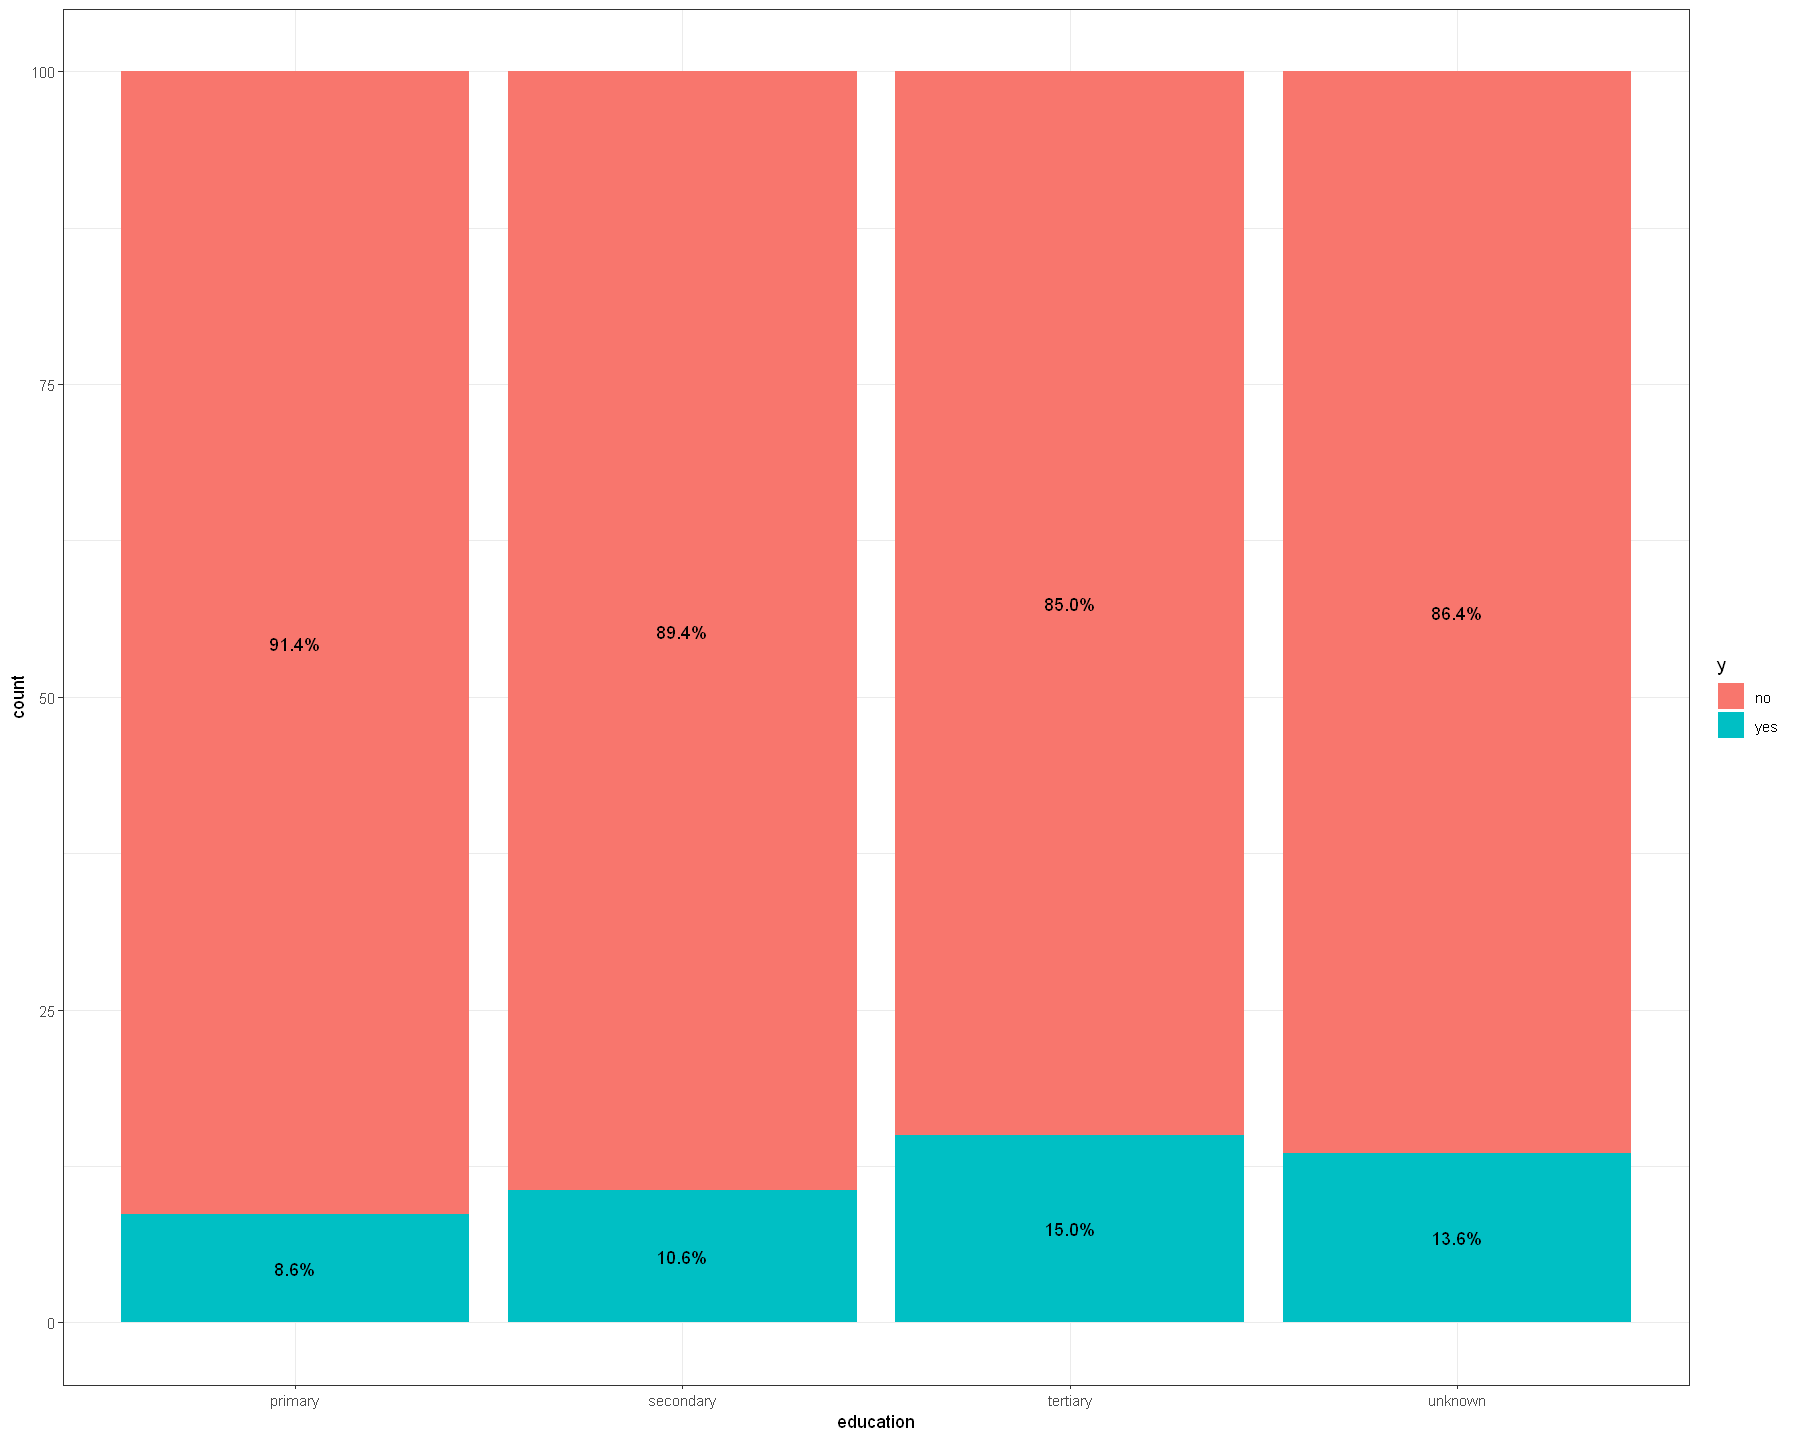

In [179]:
data %>%
  count(education, y) %>%       
  group_by(education) %>%
  mutate(count= prop.table(n) * 100) %>%
  ggplot() + aes(education, count, fill=y) +
  geom_bar(stat="identity") +
  geom_text(aes(label=paste0(sprintf("%1.1f", count),"%")),
            position=position_stack(vjust=0.5)) +
  theme_bw()

In [306]:
d <- read.csv('bank.csv')
ggcorr(d, hjust =1, label = TRUE)

ERROR: Error in ggcorr(d, hjust = 1, label = TRUE): (converted from warning) data in column(s) 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y' are not numeric and were ignored


In [186]:
#model with all parameters
model2 <- glm(y ~ ., data=data, family=binomial)
summary(model2)


Call:
glm(formula = y ~ ., family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7286  -0.3744  -0.2530  -0.1502   3.4288  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.536e+00  1.837e-01 -13.803  < 2e-16 ***
age                 1.127e-04  2.205e-03   0.051 0.959233    
jobblue-collar     -3.099e-01  7.267e-02  -4.264 2.01e-05 ***
jobentrepreneur    -3.571e-01  1.256e-01  -2.844 0.004455 ** 
jobhousemaid       -5.040e-01  1.365e-01  -3.693 0.000221 ***
jobmanagement      -1.653e-01  7.329e-02  -2.255 0.024130 *  
jobretired          2.524e-01  9.722e-02   2.596 0.009436 ** 
jobself-employed   -2.983e-01  1.120e-01  -2.664 0.007726 ** 
jobservices        -2.238e-01  8.406e-02  -2.662 0.007763 ** 
jobstudent          3.821e-01  1.090e-01   3.505 0.000457 ***
jobtechnician      -1.760e-01  6.893e-02  -2.554 0.010664 *  
jobunemployed      -1.767e-01  1.116e-01  -1.583 0.113456    
jobun

In [187]:
actual <- data$y
predicted <- round(fitted(model2))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual     0     1
   no  38940   982
   yes  3456  1833

In [188]:
accuracy <- (xt[1,1]+xt[2,2])/sum(xt)
accuracy

[1] 0.901838

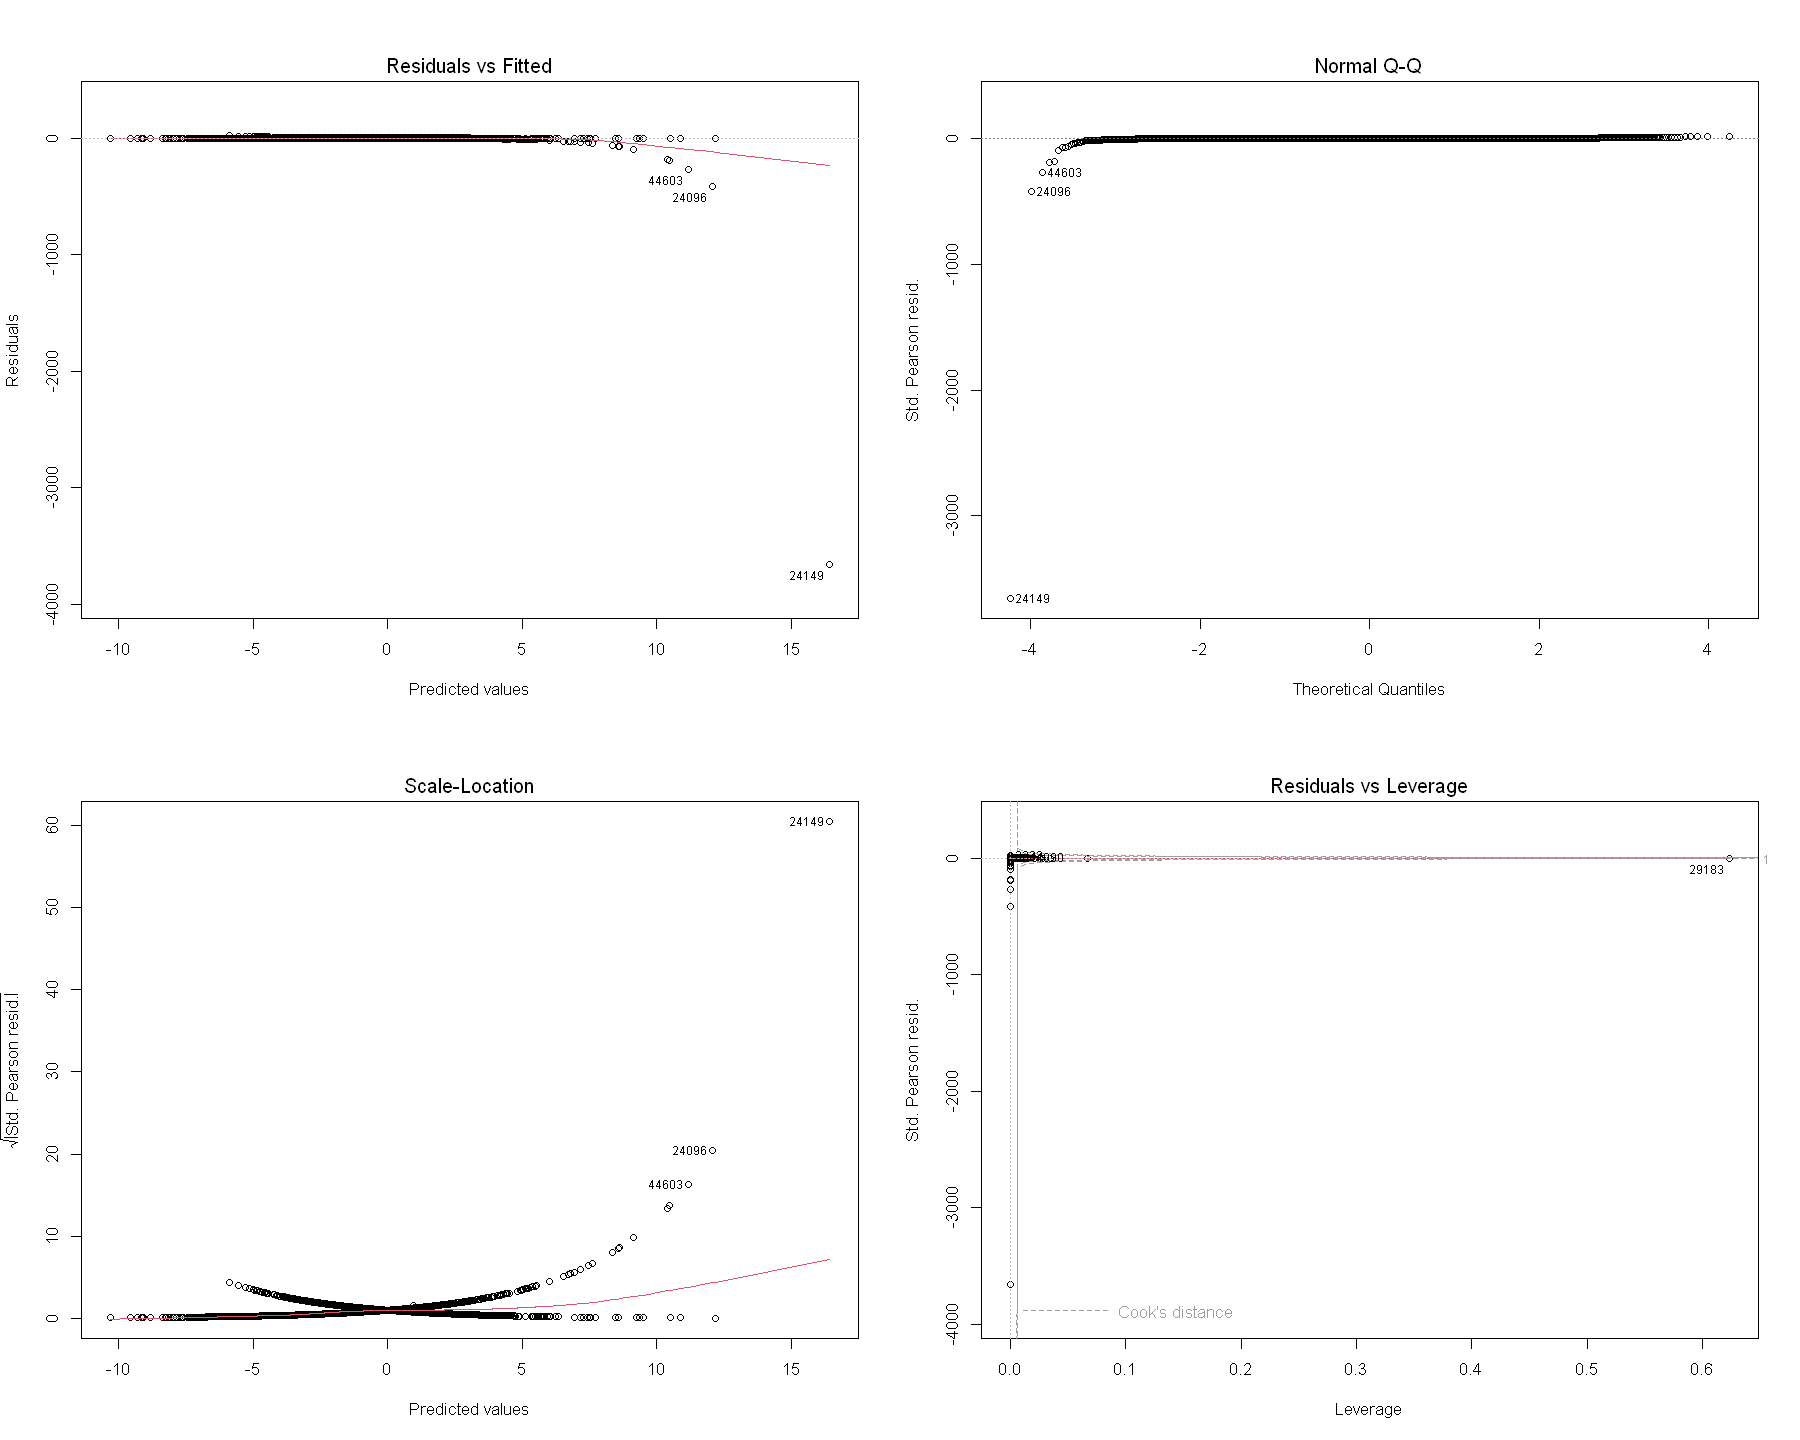

In [189]:
par(mfrow=c(2,2))
plot(model2)

In [190]:
data$pdays <- NULL
data$previous <- NULL
data$age <- NULL

In [191]:
#model after removing the non significant features
model3 <- glm(y ~ ., data=data, family=binomial)
summary(model3)


Call:
glm(formula = y ~ ., family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7289  -0.3745  -0.2532  -0.1501   3.4267  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.527e+00  1.298e-01 -19.469  < 2e-16 ***
jobblue-collar     -3.115e-01  7.262e-02  -4.289 1.79e-05 ***
jobentrepreneur    -3.580e-01  1.255e-01  -2.853 0.004330 ** 
jobhousemaid       -5.042e-01  1.360e-01  -3.706 0.000210 ***
jobmanagement      -1.645e-01  7.324e-02  -2.246 0.024718 *  
jobretired          2.541e-01  8.739e-02   2.908 0.003637 ** 
jobself-employed   -2.981e-01  1.120e-01  -2.662 0.007767 ** 
jobservices        -2.252e-01  8.404e-02  -2.680 0.007368 ** 
jobstudent          3.822e-01  1.070e-01   3.570 0.000356 ***
jobtechnician      -1.759e-01  6.892e-02  -2.552 0.010710 *  
jobunemployed      -1.778e-01  1.116e-01  -1.593 0.111168    
jobunknown         -3.123e-01  2.331e-01  -1.340 0.180396    
marit

In [192]:
actual <- data$y
predicted <- round(fitted(model3))
xt <- xtabs(~ actual + predicted)
xt

accuracy <- (xt[1,1]+xt[2,2])/sum(xt)
accuracy

      predicted
actual     0     1
   no  38942   980
   yes  3454  1835

[1] 0.9019265

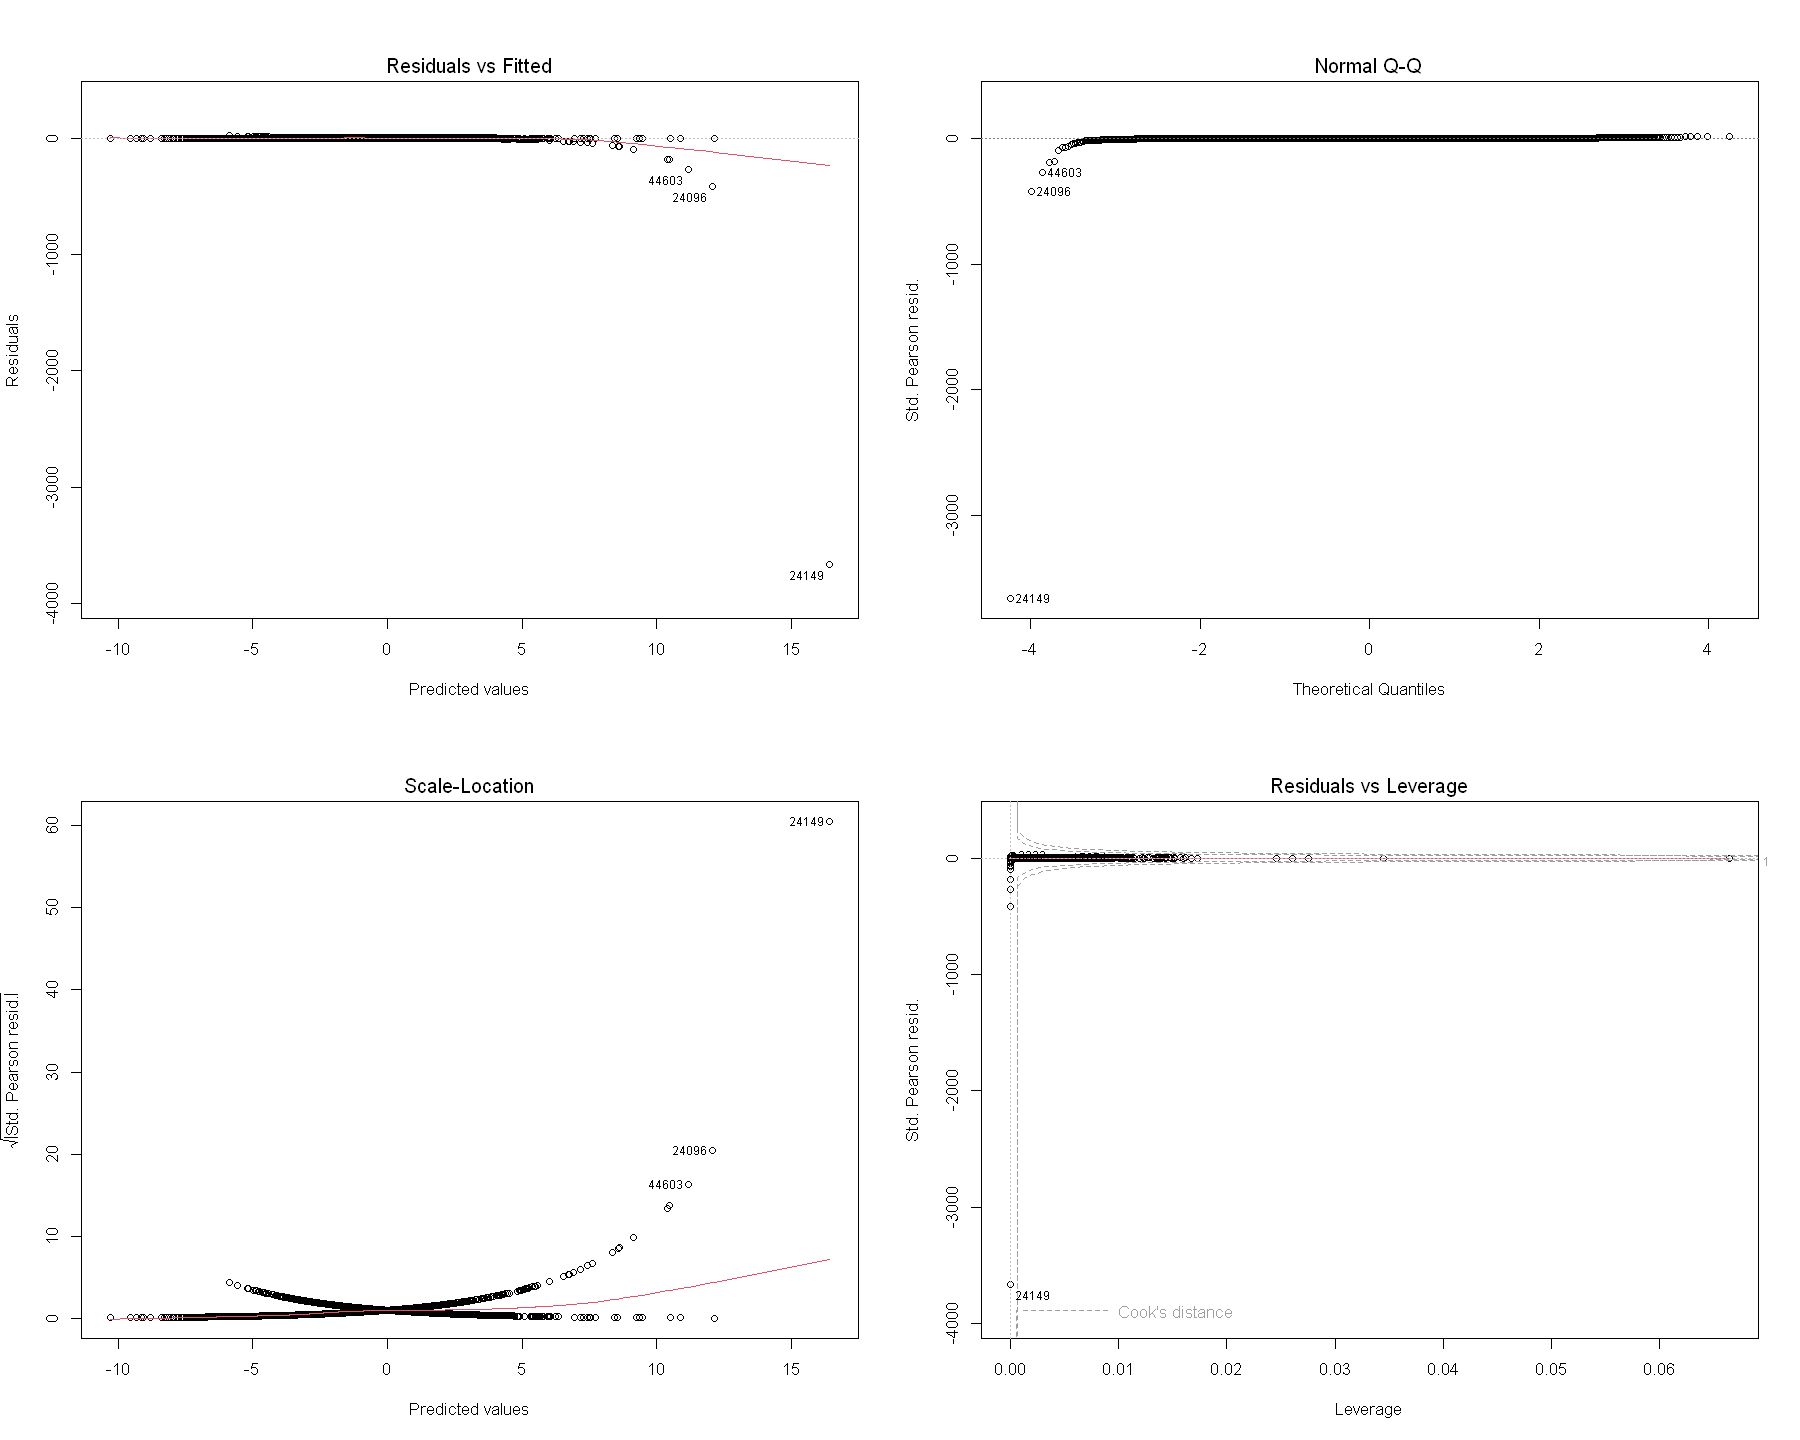

In [193]:
par(mfrow=c(2,2))
plot(model3)

In [194]:
data <- data[-c(24149),]

In [195]:
#model after removing outliers
model4 <- glm(y ~ ., data=data, family=binomial)
summary(model4)


Call:
glm(formula = y ~ ., family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.9255  -0.3741  -0.2526  -0.1496   3.4294  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.534e+00  1.299e-01 -19.507  < 2e-16 ***
jobblue-collar     -3.128e-01  7.268e-02  -4.303 1.68e-05 ***
jobentrepreneur    -3.605e-01  1.256e-01  -2.870 0.004103 ** 
jobhousemaid       -5.062e-01  1.362e-01  -3.717 0.000202 ***
jobmanagement      -1.666e-01  7.329e-02  -2.273 0.023043 *  
jobretired          2.527e-01  8.745e-02   2.890 0.003857 ** 
jobself-employed   -3.006e-01  1.121e-01  -2.681 0.007333 ** 
jobservices        -2.259e-01  8.412e-02  -2.686 0.007236 ** 
jobstudent          3.828e-01  1.071e-01   3.574 0.000352 ***
jobtechnician      -1.747e-01  6.896e-02  -2.534 0.011278 *  
jobunemployed      -1.795e-01  1.117e-01  -1.607 0.108042    
jobunknown         -3.139e-01  2.333e-01  -1.345 0.178494    
marit

In [196]:
actual <- data$y
predicted <- round(fitted(model4))
xt <- xtabs(~ actual + predicted)
xt

accuracy <- (xt[1,1]+xt[2,2])/sum(xt)
accuracy

      predicted
actual     0     1
   no  38939   982
   yes  3450  1839

[1] 0.9019686

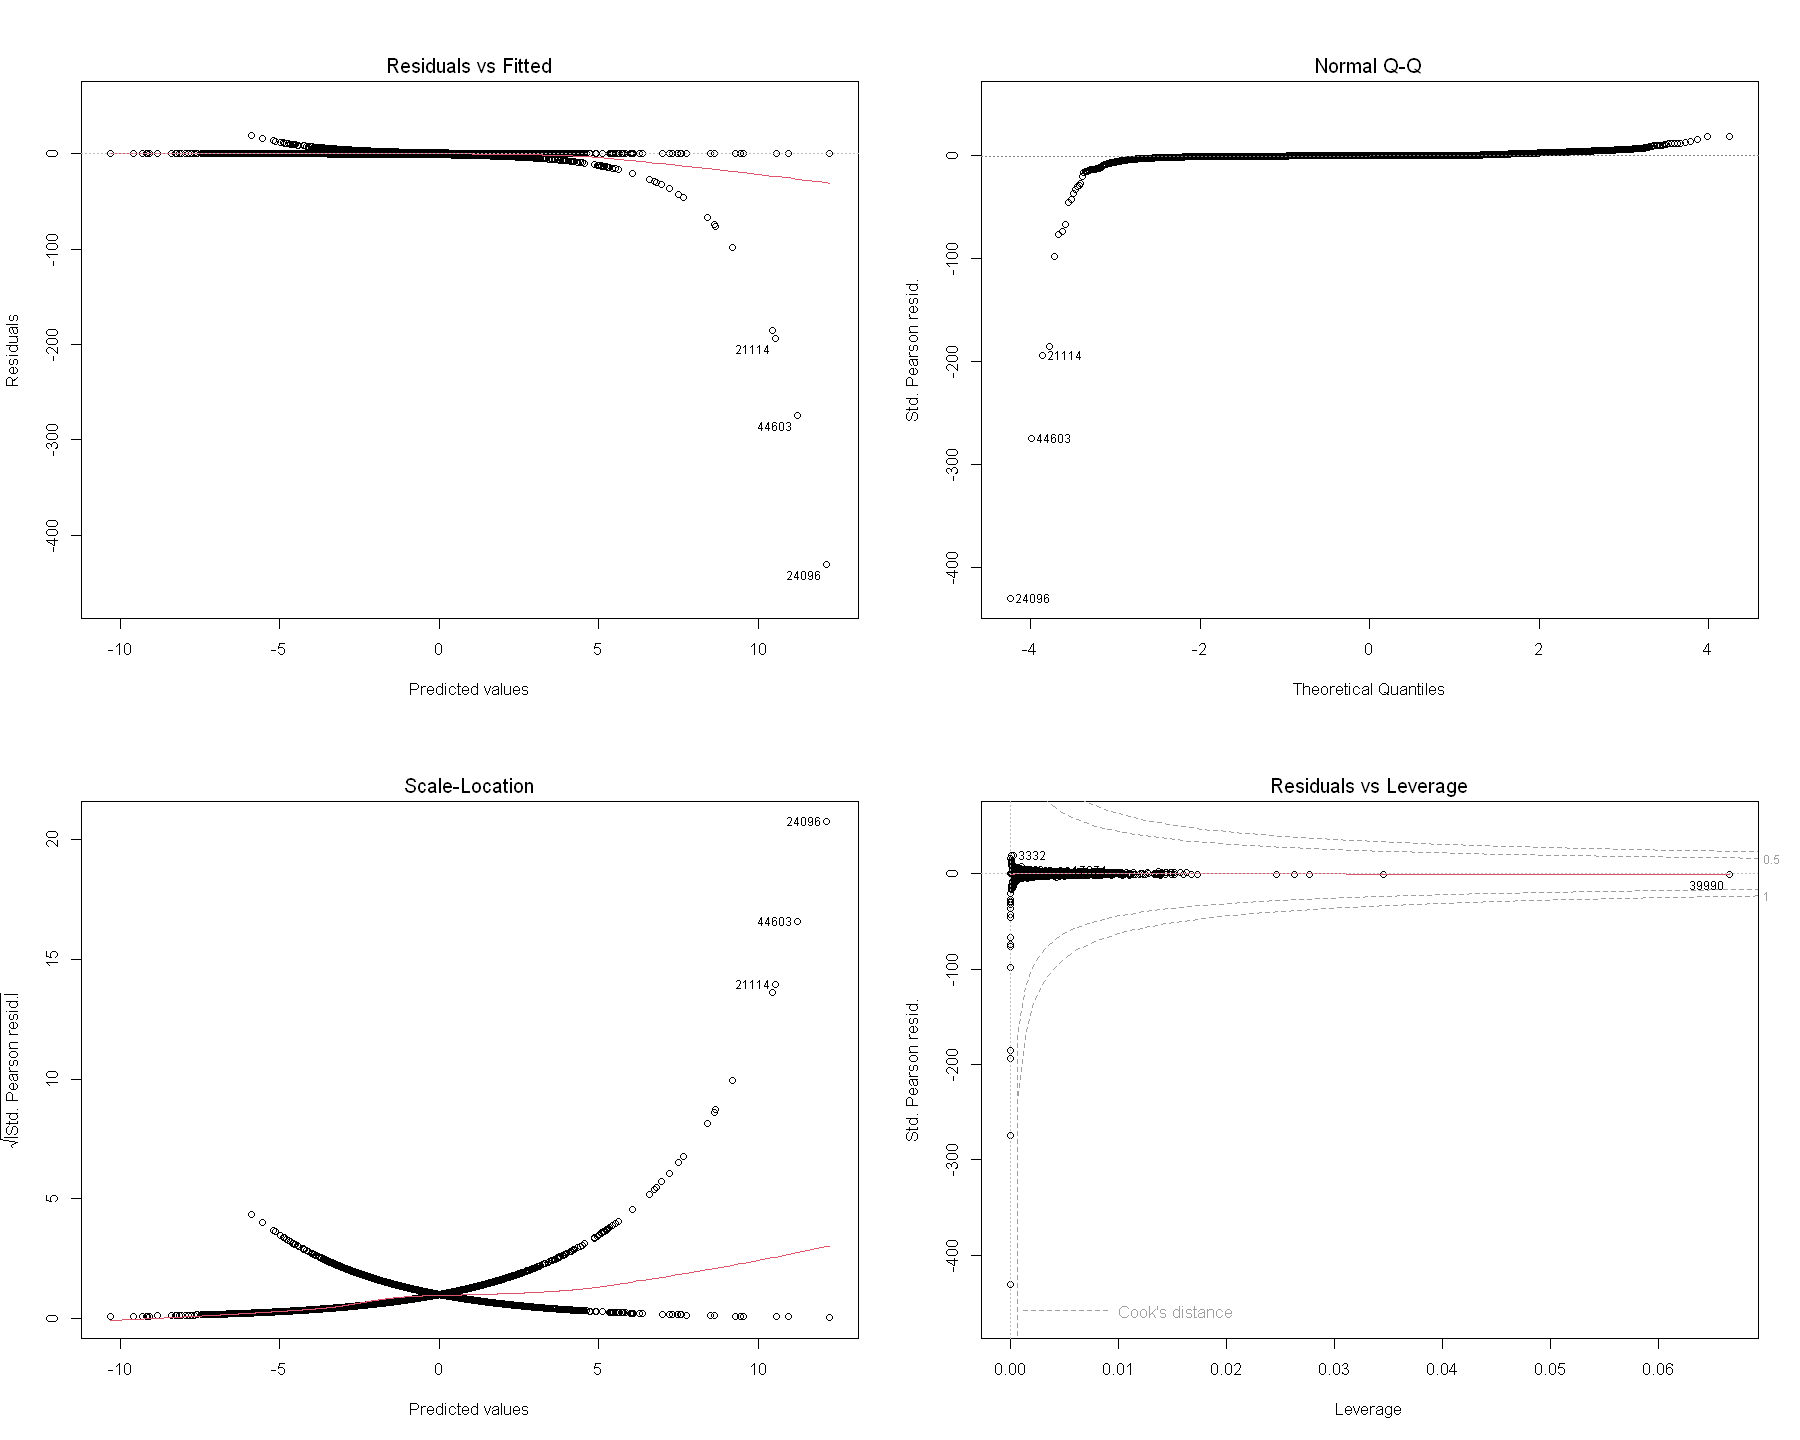

In [197]:
par(mfrow=c(2,2))
plot(model4)

In [280]:
data <- data[-c(28852),]

In [261]:
data <- data %>%  filter(!row_number() %in% c(21114, 24096, 44603))

In [262]:
model5 <- glm(y ~ ., data=data, family=binomial)
summary(model5)


Call:
glm(formula = y ~ ., family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.7531  -0.3729  -0.2512  -0.1483   3.4350  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.531e+00  1.302e-01 -19.436  < 2e-16 ***
jobblue-collar     -3.129e-01  7.283e-02  -4.297 1.73e-05 ***
jobentrepreneur    -3.556e-01  1.258e-01  -2.826 0.004713 ** 
jobhousemaid       -5.045e-01  1.364e-01  -3.698 0.000217 ***
jobmanagement      -1.692e-01  7.348e-02  -2.303 0.021269 *  
jobretired          2.594e-01  8.758e-02   2.962 0.003061 ** 
jobself-employed   -2.887e-01  1.121e-01  -2.576 0.009991 ** 
jobservices        -2.289e-01  8.434e-02  -2.715 0.006636 ** 
jobstudent          3.826e-01  1.072e-01   3.568 0.000360 ***
jobtechnician      -1.757e-01  6.914e-02  -2.541 0.011054 *  
jobunemployed      -1.807e-01  1.119e-01  -1.615 0.106379    
jobunknown         -3.136e-01  2.336e-01  -1.343 0.179332    
marit

In [263]:
actual <- data$y
predicted <- round(fitted(model5))
xt <- xtabs(~ actual + predicted)
xt

accuracy <- round(sum(diag(xt))/sum(xt)*100,2)
accuracy

      predicted
actual     0     1
   no  38916   985
   yes  3437  1838

[1] 90.21

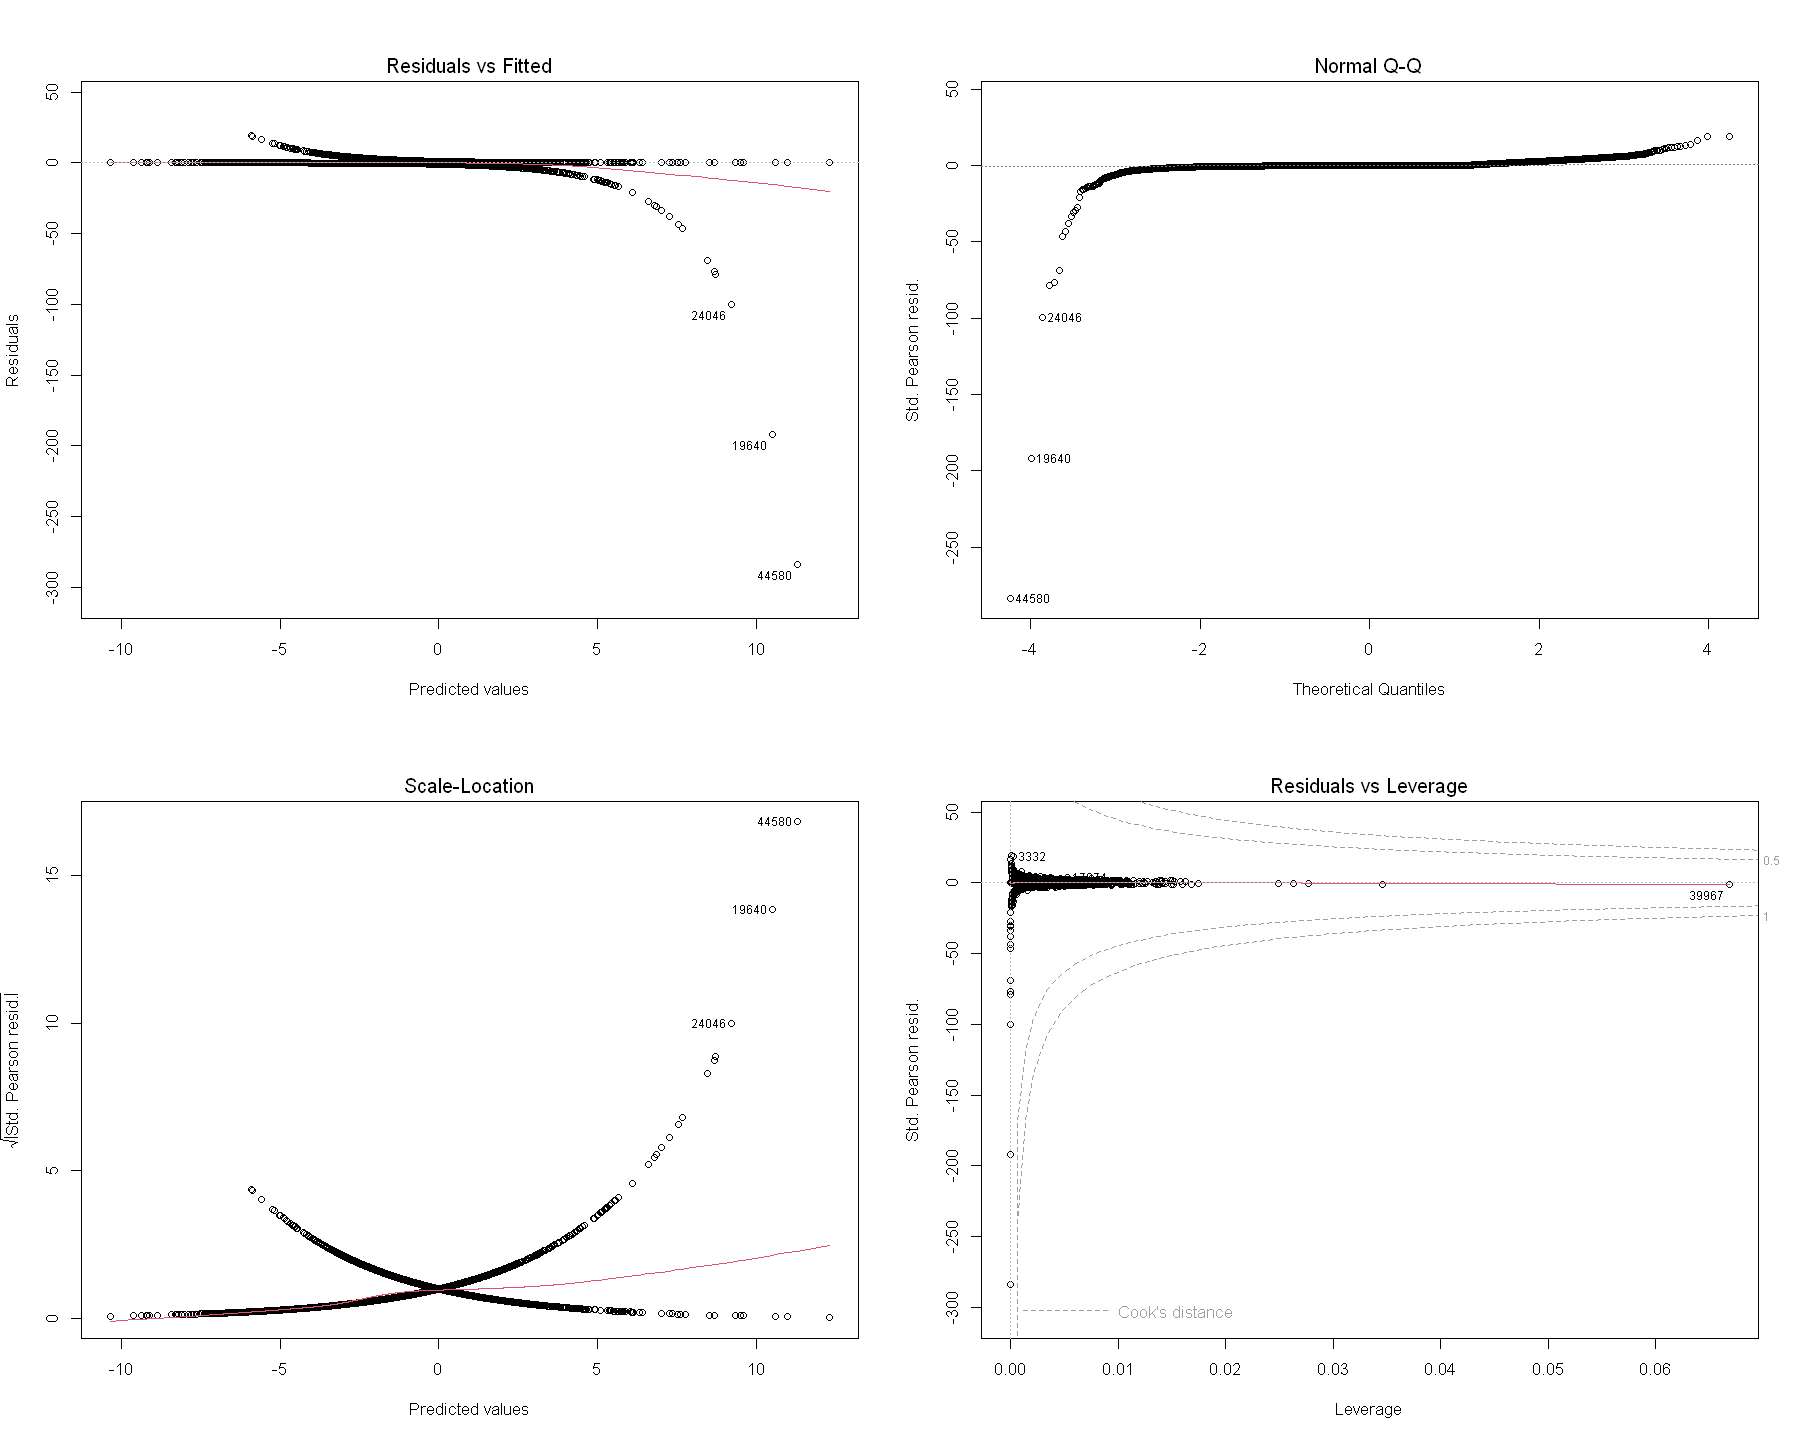

In [264]:
par(mfrow=c(2,2))
plot(model5)

In [203]:
log_imp <- varImp(model5, scale = FALSE, competes = FALSE)
log_imp

,Overall
,<dbl>
jobblue-collar,4.35924484
jobentrepreneur,2.90316371
jobhousemaid,3.75327771
jobmanagement,2.34595130
jobretired,2.83057940
jobself-employed,2.64309918
jobservices,2.72909960
jobstudent,3.54754384
jobtechnician,2.59257146


In [204]:
library(aod)
library(nnet)

In [205]:
wald.test(b=coef(model5), Sigma = vcov(model5), Terms=3)

Wald test:
----------

Chi-squared test:
X2 = 8.4, df = 1, P(> X2) = 0.0037

In [206]:
model6 <- multinom(y ~., data = data)

# weights:  41 (40 variable)
initial  value 31333.025150 
iter  10 value 15219.874074
iter  20 value 13939.198193
iter  30 value 11881.403466
iter  40 value 10852.094710
iter  50 value 10741.125779
final  value 10741.110020 
converged


In [292]:
data <- data[-c(2397, 11636),]

In [293]:
set.seed(100)
split <- sample(nrow(data), nrow(data)*0.7)

data_train <- data[split,]
data_test <- data[-split,]

In [294]:
dim(data_train)
dim(data_test)

[1] 31618    14

[1] 13552    14

In [295]:
model1 <- glm(y ~ ., data=data_train, family=binomial)
summary(model1)


Call:
glm(formula = y ~ ., family = binomial, data = data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3244  -0.3733  -0.2513  -0.1501   3.4723  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.545e+00  1.549e-01 -16.429  < 2e-16 ***
jobblue-collar     -2.333e-01  8.677e-02  -2.688 0.007179 ** 
jobentrepreneur    -3.859e-01  1.523e-01  -2.534 0.011275 *  
jobhousemaid       -5.469e-01  1.662e-01  -3.290 0.001002 ** 
jobmanagement      -1.450e-01  8.801e-02  -1.648 0.099453 .  
jobretired          2.872e-01  1.047e-01   2.743 0.006086 ** 
jobself-employed   -2.431e-01  1.347e-01  -1.804 0.071271 .  
jobservices        -1.838e-01  1.008e-01  -1.823 0.068264 .  
jobstudent          5.055e-01  1.271e-01   3.978 6.95e-05 ***
jobtechnician      -1.371e-01  8.262e-02  -1.659 0.097147 .  
jobunemployed      -1.929e-01  1.346e-01  -1.433 0.151776    
jobunknown         -3.530e-01  2.782e-01  -1.269 0.204506    

In [296]:
predictions_model1 <- predict(model1, data_test, type="response")
predictions_model1 <- ifelse(predictions_model1 > 0.5, 1, 0)
head(predictions_model1, 50)

3   7   9  12  15  18  27  38  39  41  45  47  48  55  65  68  69  70  77  78 
  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0 
 79  81  91  99 101 104 105 117 125 128 135 145 147 156 159 160 161 166 173 177 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
183 189 191 192 196 199 204 208 209 210 
  0   0   0   0   0   0   0   0   0   0

In [297]:
table(predictions_model1, data_test[,14])

                  
predictions_model1    no   yes
                 0 11707   988
                 1   294   563

In [298]:
accuracy <- table(predictions_model1, data_test[,14])
round(sum(diag(accuracy))/sum(accuracy)*100,2)

[1] 90.54

In [299]:
auc(data_test$y, predictions_model1)

Setting levels: control = no, case = yes

Setting direction: controls < cases



Area under the curve: 0.6692

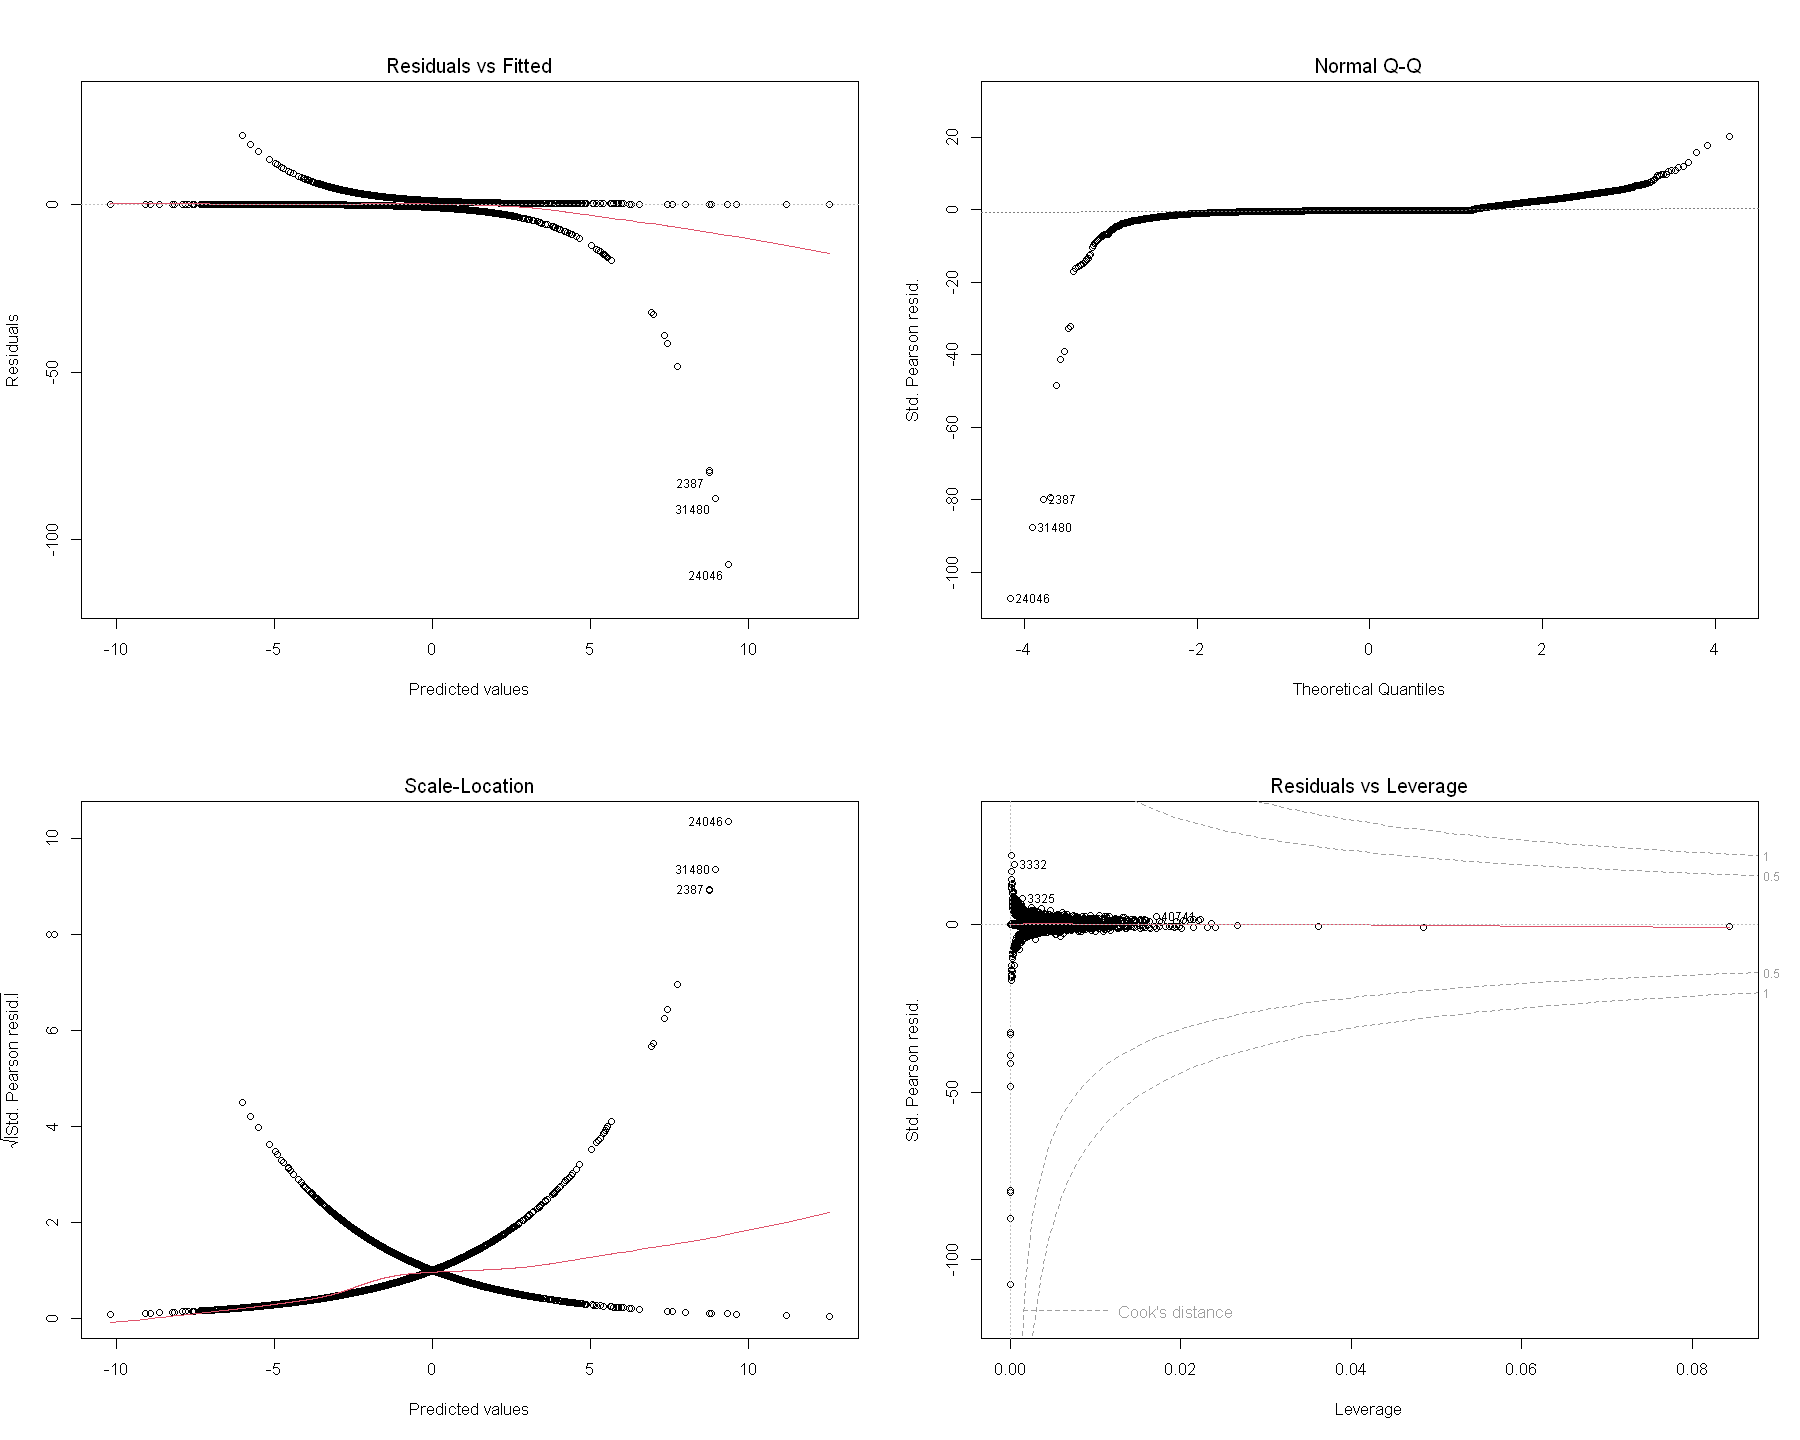

In [300]:
par(mfrow=c(2,2))
plot(model1)

In [301]:
wald.test(b=coef(model1), Sigma = vcov(model1), Terms=3)

Wald test:
----------

Chi-squared test:
X2 = 6.4, df = 1, P(> X2) = 0.011

In [302]:
model1 <- multinom(y ~., data = data)

# weights:  41 (40 variable)
initial  value 31309.458146 
iter  10 value 15198.280161
iter  20 value 13903.035489
iter  30 value 11866.606267
iter  40 value 10956.826440
iter  50 value 10694.603972
final  value 10694.547661 
converged


In [303]:
log_imp <- varImp(model1, scale = FALSE, competes = FALSE)
log_imp

,Overall
,<dbl>
jobblue-collar,3.138045e-01
jobentrepreneur,3.581882e-01
jobhousemaid,5.061905e-01
jobmanagement,1.713830e-01
jobretired,2.632501e-01
jobself-employed,2.909867e-01
jobservices,2.300442e-01
jobstudent,3.831271e-01
jobtechnician,1.755548e-01
